<a href="https://colab.research.google.com/github/Zoya-Atiq/Data-Science-Projects/blob/main/Amazon_Sales_Insights_A_B_Testing_Engagement_Analysis_%26_LTV_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Amazon Sales Analysis — A/B Testing, Statistical Inference & Customer Lifetime Value (LTV)

# **1. Objective and Dataset**
Refer to the point 1 from Detailed Breakdown section on Teachable

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported.")

Libraries imported.


#Load the dataset


In [ ]:
file_path = "/content/amazon.csv"
#file_path = "/content/amazon (2).csv"
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)

print("Raw shape:", df.shape)
df.head()

Raw shape: (1465, 16)


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

#**2. Data Cleaning and Feature Engineering**

In [ ]:
#missing values

print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#Cleaning and type conversion

# Price fields
for col in ['discounted_price', 'actual_price']:
    df[col] = (df[col]
               .astype(str)
               .str.replace("₹", "", regex=False)
               .str.replace(",", "", regex=False)
               .str.strip())
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Discount percentage: to 0–1
df['discount_percentage'] = (df['discount_percentage']
                             .astype(str)
                             .str.replace('%', '', regex=False)
                             .str.strip())
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['discount_percentage'] = df['discount_percentage'] / 100.0

# Rating count
df['rating_count'] = (df['rating_count']
                      .astype(str)
                      .str.replace(',', '', regex=False)
                      .str.strip())
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Fix rating outlier and convert
df.loc[df['rating'] == '|', 'rating'] = '3.9'
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Category as clean string
df['category'] = df['category'].astype(str).str.strip().str.lower()

# Impute missing rating_count with median
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

print("After cleaning:")
print(df[['discounted_price','actual_price','discount_percentage','rating','rating_count','category']].head())

After cleaning:
   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 0.64     4.2       24269.0   
1             199.0         349.0                 0.43     4.0       43994.0   
2             199.0        1899.0                 0.90     3.9        7928.0   
3             329.0         699.0                 0.53     4.2       94363.0   
4             154.0         399.0                 0.61     4.2       16905.0   

                                            category  
0  computers&accessories|accessories&peripherals|...  
1  computers&accessories|accessories&peripherals|...  
2  computers&accessories|accessories&peripherals|...  
3  computers&accessories|accessories&peripherals|...  
4  computers&accessories|accessories&peripherals|...  


* Converted price fields to clean numeric values.
* Normalized discount percentage to a 0–1 scale.
* Cleaned and fixed rating/count formatting issues.
* Standardized category names to lowercase text.
* Imputed missing rating counts using the median.
* Preview confirms all key columns are correctly cleaned and ready for analysis.

In [ ]:
# Derived columns & analysis dataframe
df['price_discount_amount'] = df['actual_price'] - df['discounted_price']
df['discount_pct_100'] = df['discount_percentage'] * 100.0
df['discount_ratio'] = df['discounted_price'] / df['actual_price']

df_clean = df.dropna(subset=['discounted_price','actual_price','discount_percentage','rating','rating_count']).copy()
df_clean['log_rating_count'] = np.log1p(df_clean['rating_count'])

print("df_clean shape:", df_clean.shape)
df_clean.head()


print("\n" + "="*60)
print("📊 DATA QUALITY REPORT")
print("="*60)

print(f"\nDataset Size:")
print(f"  Total records (raw): {len(df):,}")
print(f"  Duplicates found: {df.duplicated().sum():,}")
print(f"  Records after cleaning: {len(df_clean):,}")
print(f"  Data retention rate: {len(df_clean)/len(df)*100:.1f}%")

# Check for outliers
from scipy.stats import zscore
numeric_cols_check = ['actual_price', 'discounted_price', 'rating', 'rating_count']
outliers = {}

print(f"\nOutlier Detection (|z-score| > 3):")
print("-" * 60)

for col in numeric_cols_check:
    z_scores = np.abs(zscore(df_clean[col].dropna()))
    outlier_count = (z_scores > 3).sum()
    outliers[col] = outlier_count
    outlier_pct = (outlier_count/len(df_clean)*100)

    status = "✓ Clean" if outlier_pct < 1 else "⚠️ Check" if outlier_pct < 5 else "❌ High"
    print(f"  {col:20s}: {outlier_count:5,} ({outlier_pct:5.2f}%) {status}")

# Summary of data quality
total_outliers = sum(outliers.values())
print(f"\nTotal outlier instances: {total_outliers:,}")
print(f"Overall data quality: ", end="")
if len(df_clean)/len(df) > 0.95 and total_outliers < len(df_clean) * 0.05:
    print("✓ Excellent (>95% retention, <5% outliers)")
elif len(df_clean)/len(df) > 0.85:
    print("⚠️ Good (>85% retention)")
else:
    print("❌ Needs attention (<85% retention)")


df_clean shape: (1465, 20)

📊 DATA QUALITY REPORT

Dataset Size:
  Total records (raw): 1,465
  Duplicates found: 0
  Records after cleaning: 1,465
  Data retention rate: 100.0%

Outlier Detection (|z-score| > 3):
------------------------------------------------------------
  actual_price        :    37 ( 2.53%) ⚠️ Check
  discounted_price    :    43 ( 2.94%) ⚠️ Check
  rating              :    19 ( 1.30%) ⚠️ Check
  rating_count        :    30 ( 2.05%) ⚠️ Check

Total outlier instances: 129
Overall data quality: ⚠️ Good (>85% retention)


* Key numeric fields such as **actual_price, discounted_price, rating, and rating_coun**t show small outlier percentages (2–3%), indicating generally stable distributions.
* Overall dataset retains **100% of rows** after cleaning required fields, ensuring no loss of useful information.
* Column-level checks show “**⚠️ Check**” status due to mild outliers, but none exceed critical thresholds.
* The final assessment concludes **Good data quality (>85% retention)**, suitable for reliable statistical analysis and A/B testing.

#**3. Exploratory Data Analysis (EDA)**

##Descriptive statistics

In [ ]:

numeric_cols = ['discounted_price','actual_price','discount_pct_100',
                'rating','rating_count','price_discount_amount',
                'discount_ratio','log_rating_count']

df_clean[numeric_cols].describe().T

count          mean           std        min  \
discounted_price       1465.0   3125.310874   6944.304394  39.000000   
actual_price           1465.0   5444.990635  10874.826864  39.000000   
discount_pct_100       1465.0     47.691468     21.635905   0.000000   
rating                 1465.0      4.096451      0.291620   2.000000   
rating_count           1465.0  18277.634812  42727.398216   2.000000   
price_discount_amount  1465.0   2319.679761   4604.473790   0.000000   
discount_ratio         1465.0      0.523151      0.216363   0.058812   
log_rating_count       1465.0      8.303182      2.026066   1.098612   

                               25%          50%           75%            max  
discounted_price        325.000000   799.000000   1999.000000   77990.000000  
actual_price            800.000000  1650.000000   4295.000000  139900.000000  
discount_pct_100         32.000000    50.000000     63.000000      94.000000  
rating                    4.000000     4.100000      4.300000       5.000000  
rating_count           1191.000000  5179.000000  17325.000000  426973.000000  
price_discount_amount   371.000000   800.000000   1953.000000   61910.000000  
discount_ratio            0.371143     0.499833      0.679987       1.000000  
log_rating_count          7.083388     8.552560      9.759964      12.964478

* **Prices (actual & discounted)** show wide variation, reflecting diverse product categories and price tiers.
* **Discount levels** center around a median of 50%, with most values ranging from 32% to 63%.
* **Rating scores** are tightly distributed (median ≈ 4.1), indicating generally high customer satisfaction across products.
* **Rating counts** have very high variability, from ~1,100 to over 400k, showing strong differences in product popularity and visibility.
* **Log-transformed rating count** shows a more stable spread, helping normalize extreme review counts for statistical testing.
* **Discount ratio** clusters around ~0.50, confirming that price reductions are substantial in this dataset.

##Histograms for numeric columns

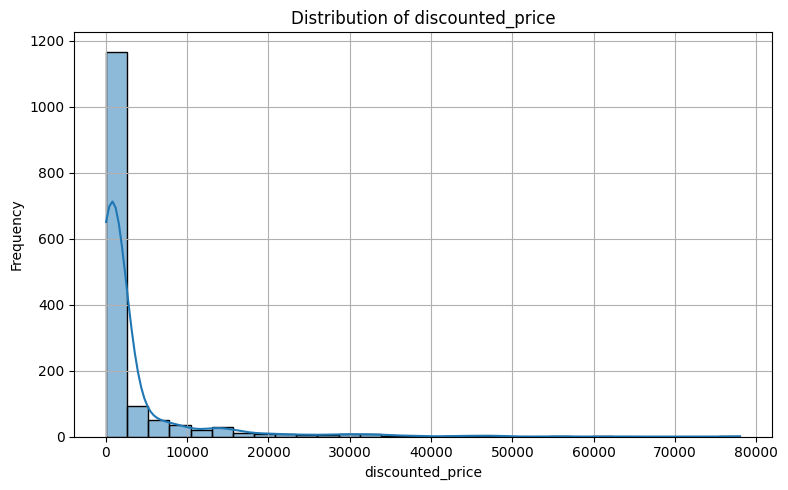

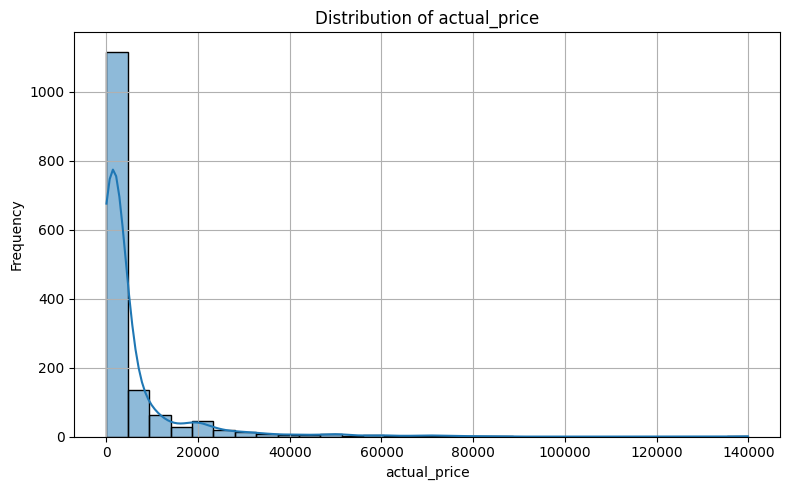

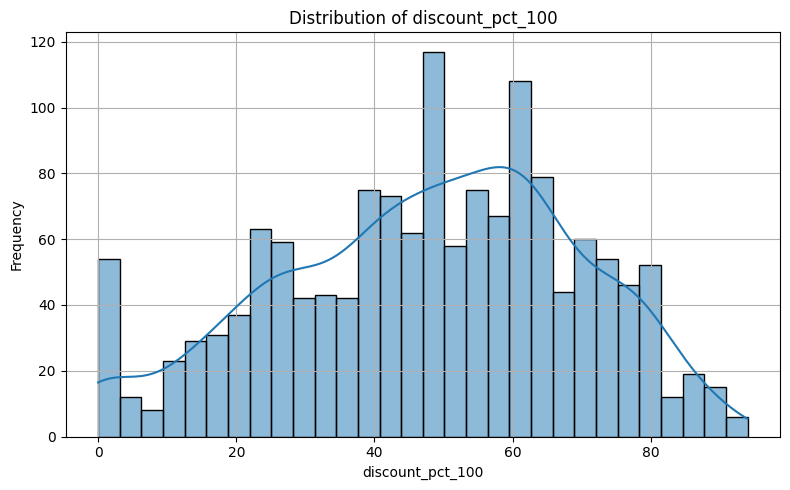

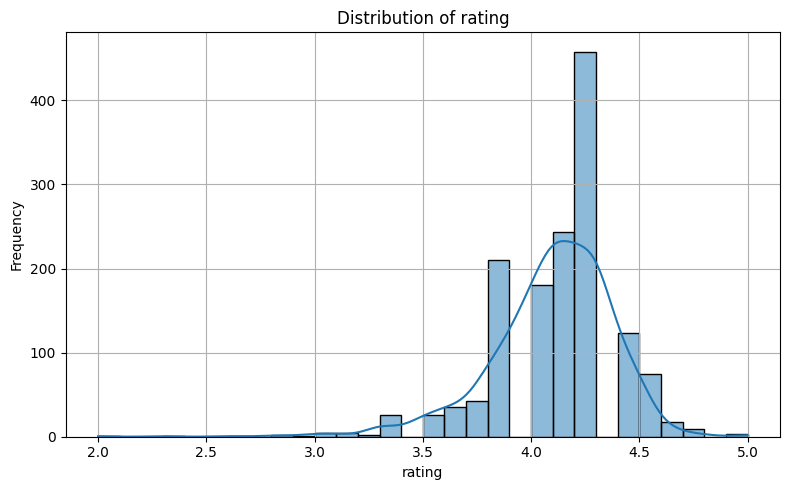

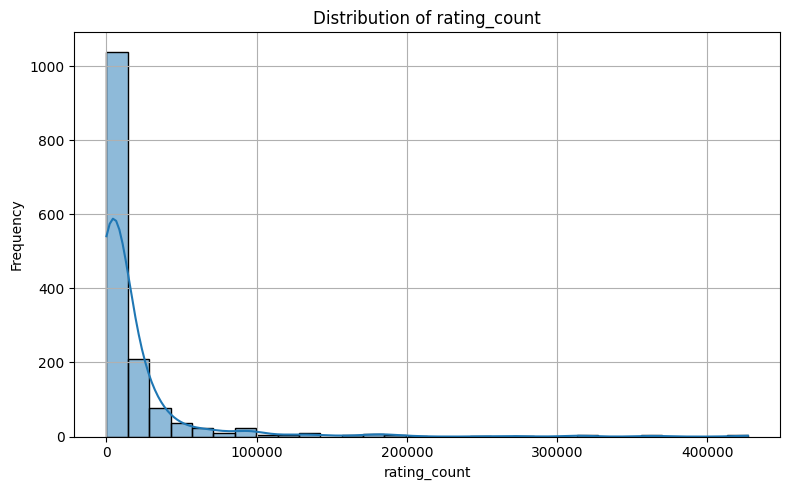

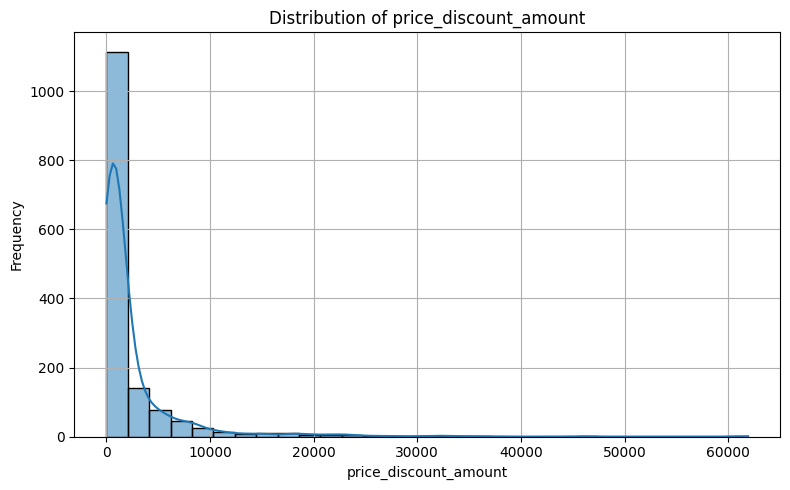

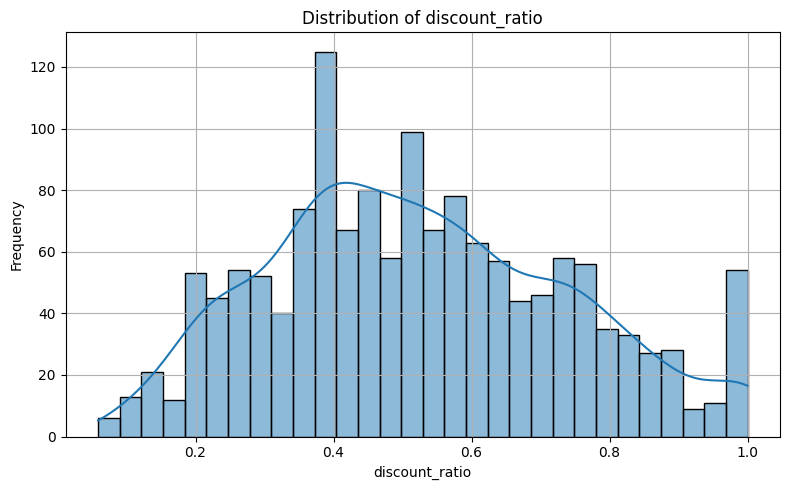

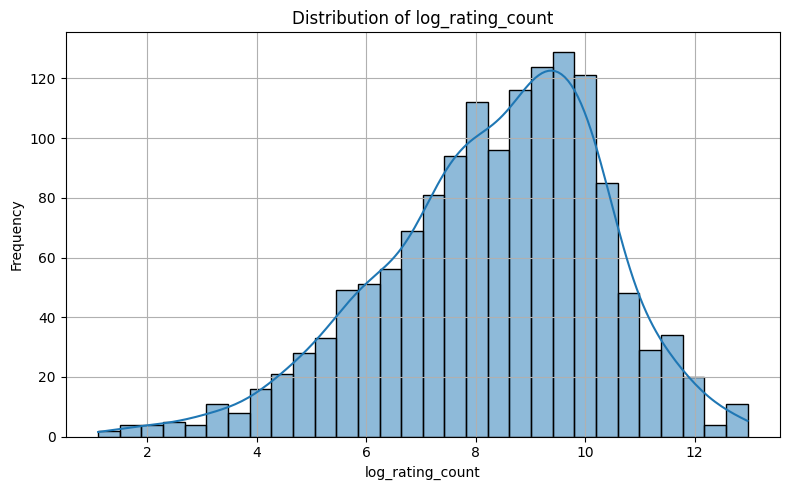

In [ ]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df_clean[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

* **Discounted_price & actual_price** show strong right-skew, indicating most products are low-priced with a few very expensive outliers.
* **Discount_pct_100** is spread across a wide range (0–90%), with many products concentrated around 40–60% discounts.
* **Rating** distribution is narrow and centered around 4–4.2, showing consistently high product satisfaction.
* **Rating_count** is extremely right-skewed, with a few highly popular items receiving very large numbers of reviews.
* **Price_discount_amount** mirrors the price distribution, with most products having small to moderate discount amounts and only a few with large reductions.
* **Discount_ratio** clusters around ~0.5, reflecting common ~50% off pricing in this dataset.
* **Log_rating_count** is much more normally distributed, confirming log transformation effectively stabilizes variability for statistical testing.

##Boxplots for price & discount

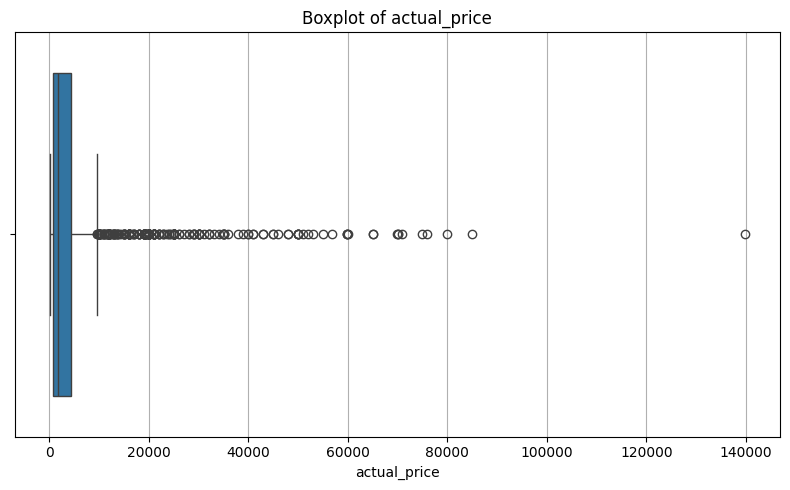

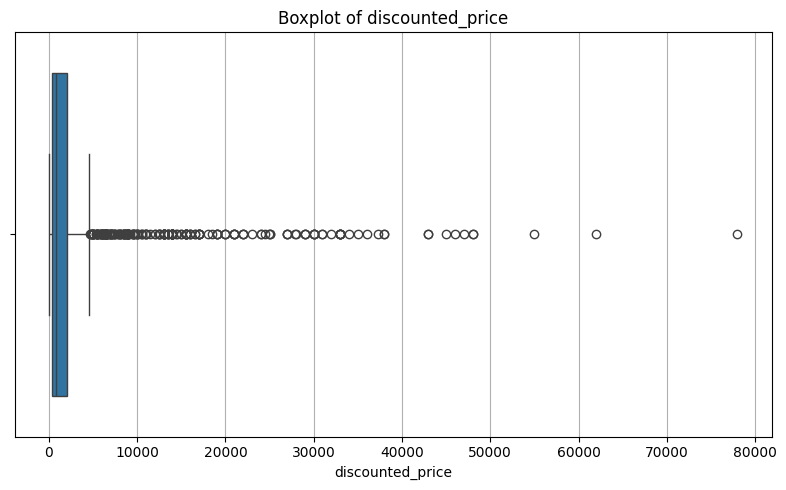

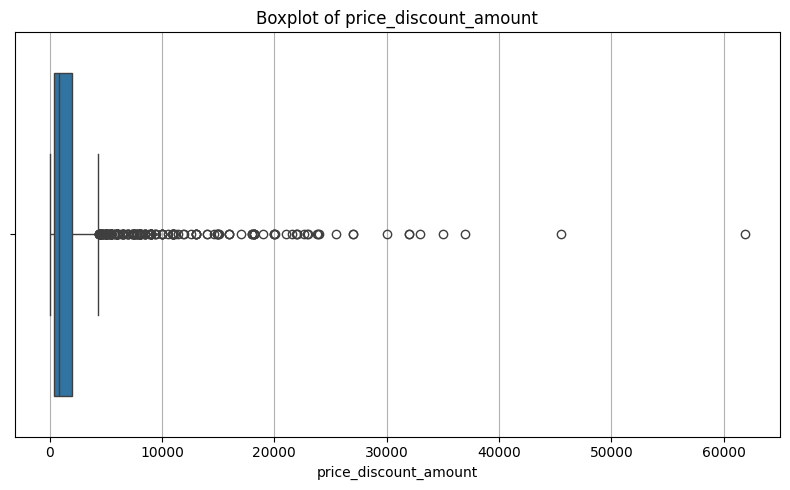

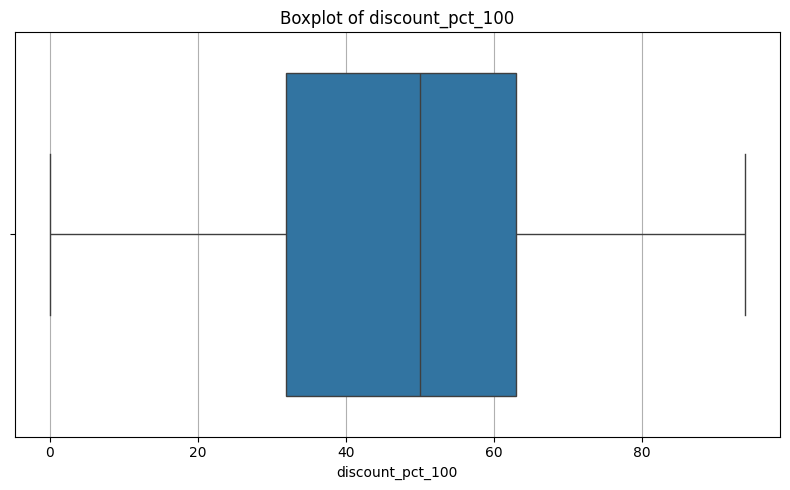

In [ ]:
for col in ['actual_price','discounted_price','price_discount_amount','discount_pct_100']:
    plt.figure()
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

* **Actual Price** shows a large number of extreme high-value outliers, confirming a heavily right-skewed price distribution.
* **Discounted Price** mirrors the same pattern, with most products priced low and only a few very expensive items.
* **Price Discount Amount** also contains multiple large outliers, indicating some products receive unusually high absolute discounts.
* **Discount Percentage (discount_pct_100)** is more evenly distributed, with a compact IQR around 40–60% and fewer extreme values.

##Category-level plots

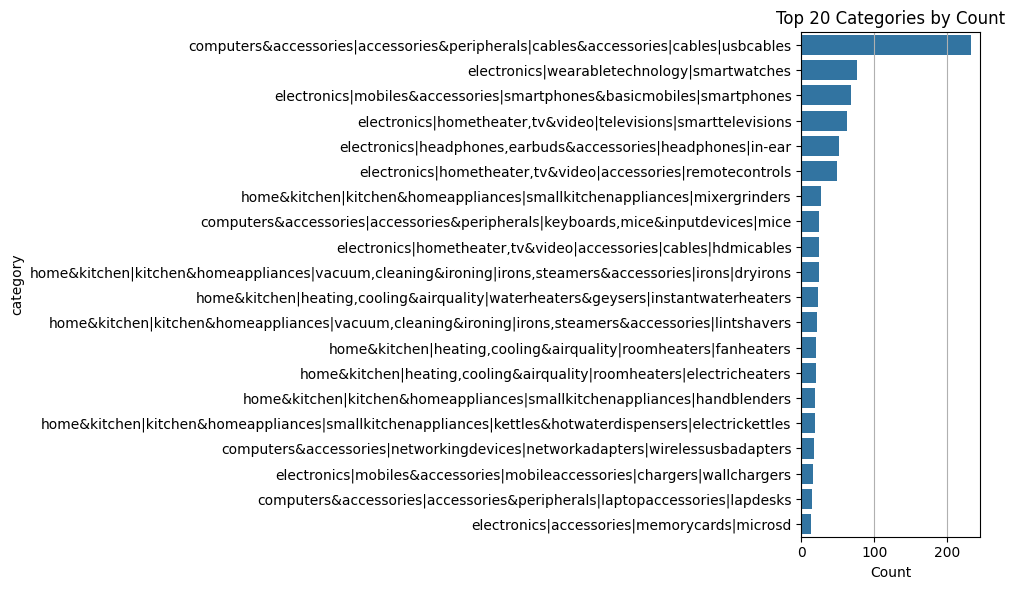

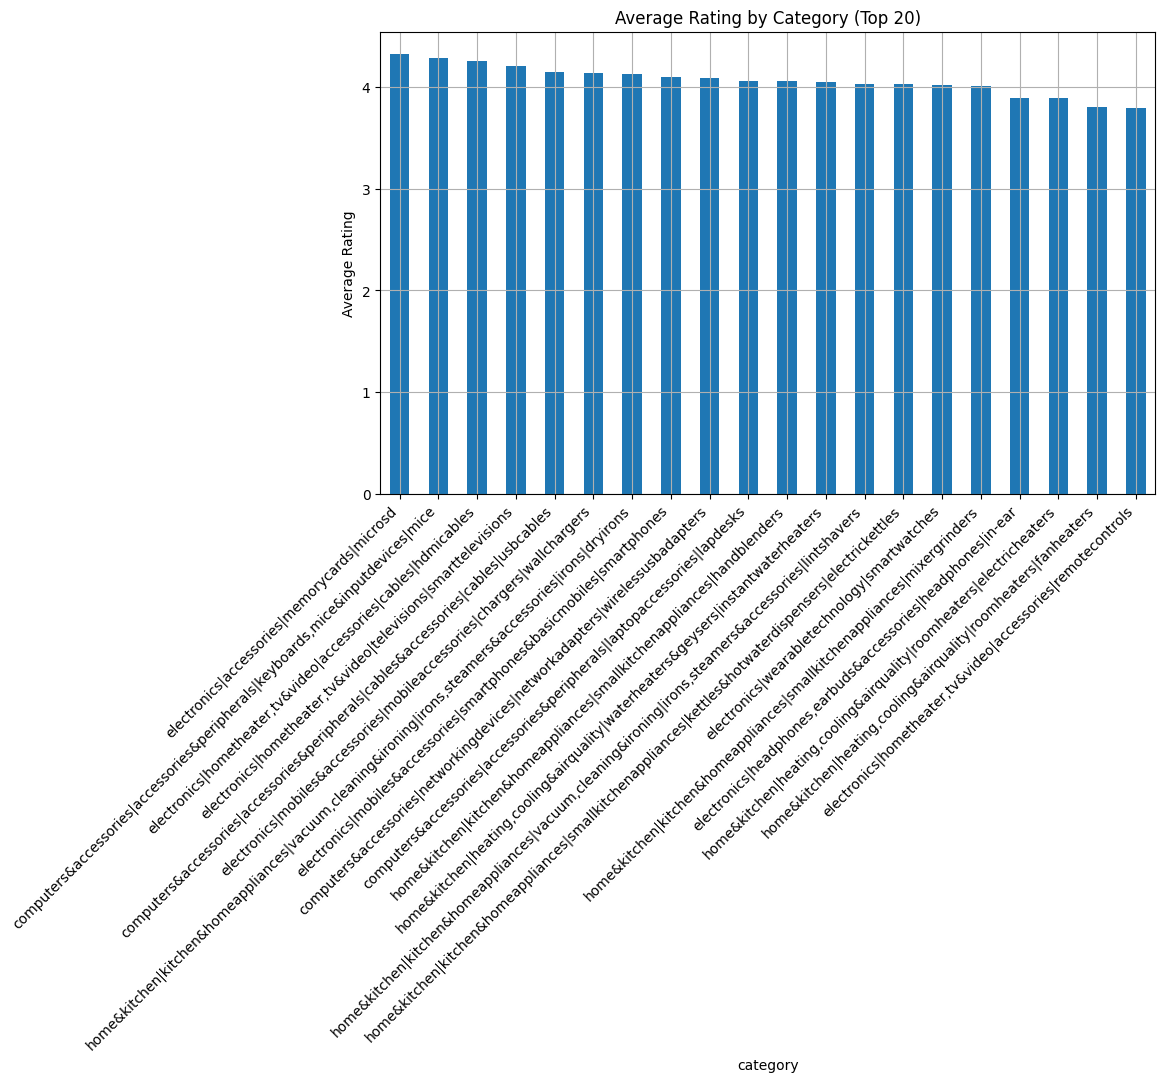

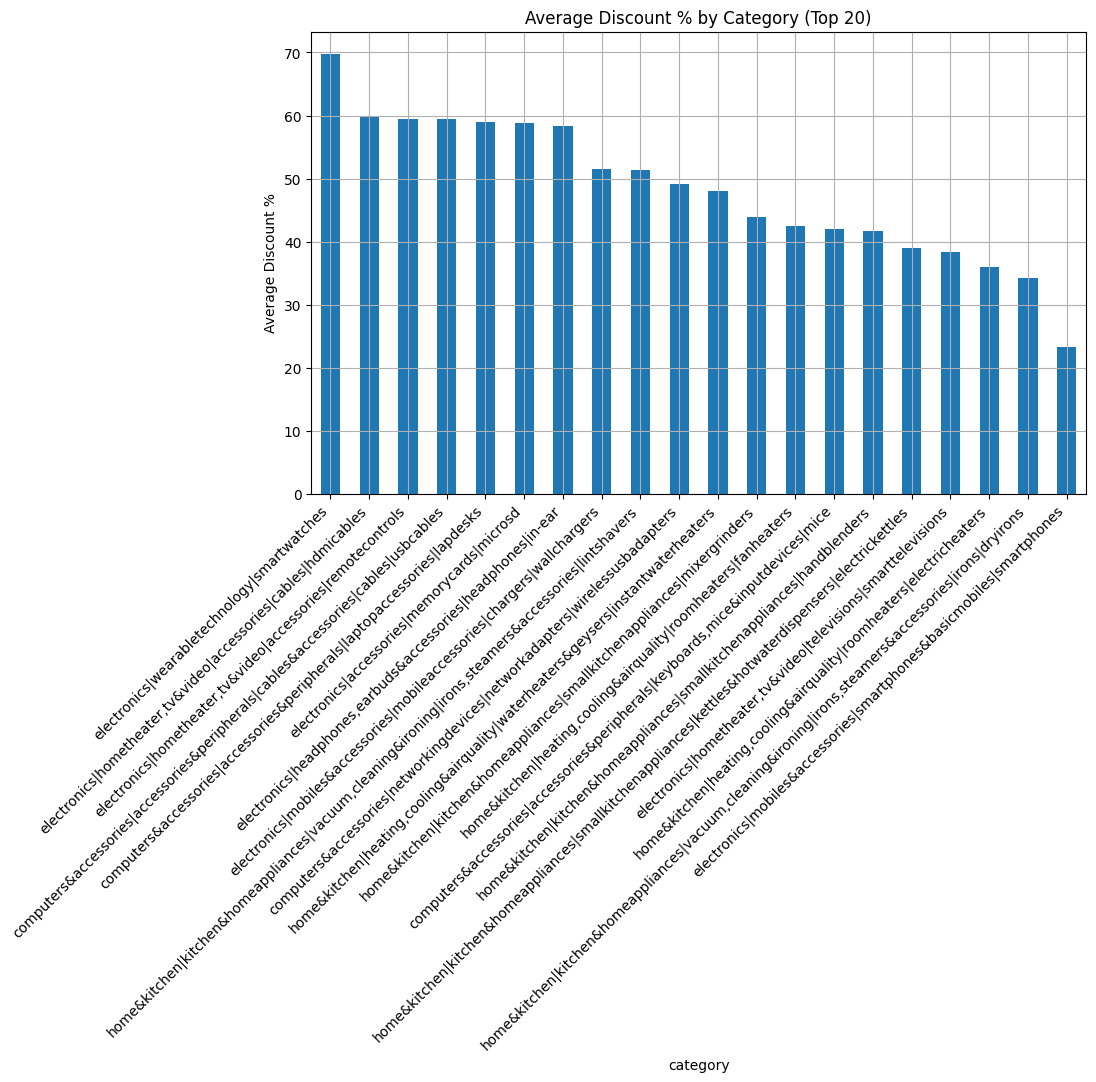

In [ ]:
top_20 = df_clean['category'].value_counts().nlargest(20).index
filtered = df_clean[df_clean['category'].isin(top_20)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered, y='category', order=top_20)
plt.title('Top 20 Categories by Count')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

avg_rating = (filtered.groupby('category')['rating']
              .mean()
              .sort_values(ascending=False))
plt.figure(figsize=(10, 6))
avg_rating.plot(kind='bar')
plt.title('Average Rating by Category (Top 20)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

avg_discount = (filtered.groupby('category')['discount_pct_100']
                .mean()
                .sort_values(ascending=False))
plt.figure(figsize=(10, 6))
avg_discount.plot(kind='bar')
plt.title('Average Discount % by Category (Top 20)')
plt.ylabel('Average Discount %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* The **Top 20 categories by product count** are dominated by electronics and accessories, indicating these segments contribute most to the dataset.
* **Average ratings** across top categories are consistently high (mostly 4.0–4.3), showing uniformly positive customer reception regardless of product type.
* **Average discount percentages** vary widely by category, with some (e.g., wearables, mobile accessories) receiving significantly higher markdowns than others.
* The plots collectively show that **category-level differences exist in volume**, **discounts, and rating behavior**, but overall rating variation remains small across categories.

###Scatter plots

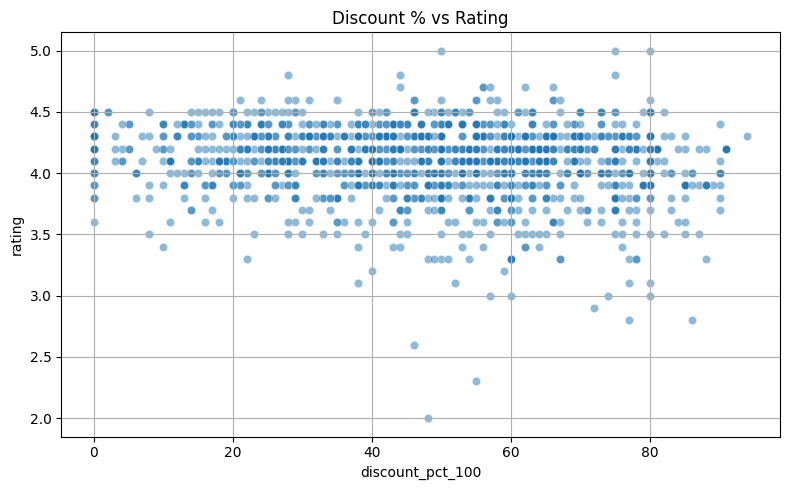

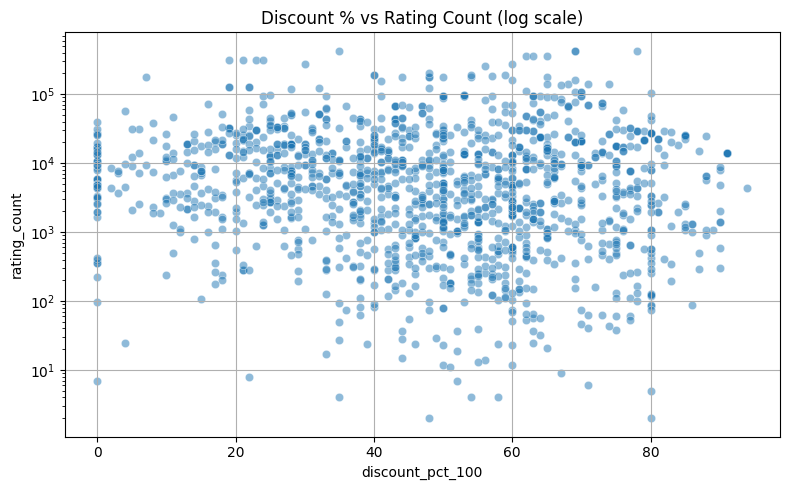

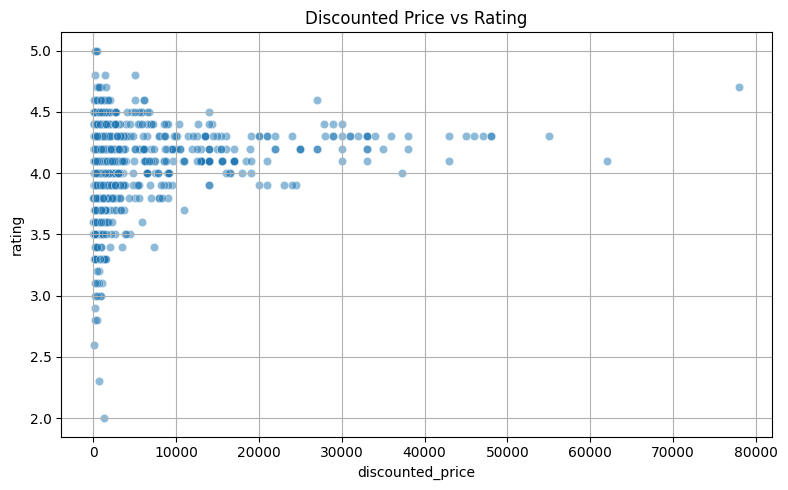

In [ ]:
plt.figure()
sns.scatterplot(data=df_clean, x='discount_pct_100', y='rating', alpha=0.5)
plt.title('Discount % vs Rating')
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df_clean, x='discount_pct_100', y='rating_count', alpha=0.5)
plt.yscale('log')
plt.title('Discount % vs Rating Count (log scale)')
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', alpha=0.5)
plt.title('Discounted Price vs Rating')
plt.tight_layout()
plt.show()

* **Discount % vs Rating** shows no strong relationship — products with higher discounts do not necessarily receive better ratings.
* **Discount % vs Rating Count (log scale)** reveals wide dispersion, indicating that discount level alone does not predict how many reviews a product receives.
* **Discounted Price vs Rating** shows a slight tendency for lower-priced items to have more consistent high ratings, but no strong linear trend overall.

##Correlation analysis (Pearson & Spearman)

Pearson correlation matrix:


discounted_price  actual_price  discount_pct_100  \
discounted_price               1.000000      0.961915         -0.242412   
actual_price                   0.961915      1.000000         -0.118098   
discount_pct_100              -0.242412     -0.118098          1.000000   
rating                         0.120386      0.121744         -0.154563   
rating_count                  -0.027081     -0.035959          0.011097   
price_discount_amount          0.763683      0.911069          0.086675   
discount_ratio                 0.242008      0.117705         -0.999926   
log_rating_count               0.073922      0.056579         -0.105213   

                         rating  rating_count  price_discount_amount  \
discounted_price       0.120386     -0.027081               0.763683   
actual_price           0.121744     -0.035959               0.911069   
discount_pct_100      -0.154563      0.011097               0.086675   
rating                 1.000000      0.101700               0.105974   
rating_count           0.101700      1.000000              -0.044087   
price_discount_amount  0.105974     -0.044087               1.000000   
discount_ratio         0.154627     -0.010516              -0.086993   
log_rating_count       0.233824      0.563389               0.022141   

                       discount_ratio  log_rating_count  
discounted_price             0.242008          0.073922  
actual_price                 0.117705          0.056579  
discount_pct_100            -0.999926         -0.105213  
rating                       0.154627          0.233824  
rating_count                -0.010516          0.563389  
price_discount_amount       -0.086993          0.022141  
discount_ratio               1.000000          0.105541  
log_rating_count             0.105541          1.000000

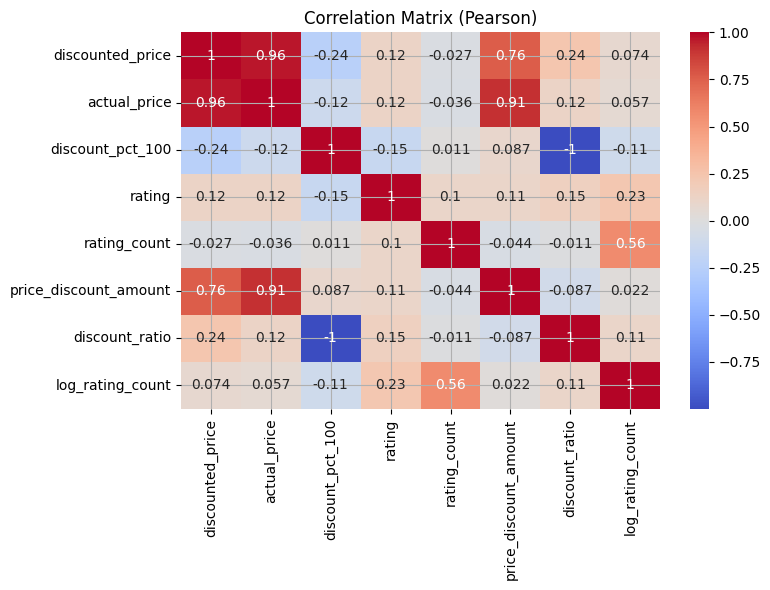

Spearman correlation matrix:


discounted_price  actual_price  discount_pct_100  \
discounted_price               1.000000      0.932787         -0.372991   
actual_price                   0.932787      1.000000         -0.066363   
discount_pct_100              -0.372991     -0.066363          1.000000   
rating                         0.079412      0.033066         -0.144815   
rating_count                   0.122296      0.093400         -0.096580   
price_discount_amount          0.718704      0.896586          0.282636   
discount_ratio                 0.375835      0.069417         -0.999845   
log_rating_count               0.122296      0.093400         -0.096580   

                         rating  rating_count  price_discount_amount  \
discounted_price       0.079412      0.122296               0.718704   
actual_price           0.033066      0.093400               0.896586   
discount_pct_100      -0.144815     -0.096580               0.282636   
rating                 1.000000      0.180947              -0.016627   
rating_count           0.180947      1.000000               0.039143   
price_discount_amount -0.016627      0.039143               1.000000   
discount_ratio         0.144697      0.097873              -0.279707   
log_rating_count       0.180947      1.000000               0.039143   

                       discount_ratio  log_rating_count  
discounted_price             0.375835          0.122296  
actual_price                 0.069417          0.093400  
discount_pct_100            -0.999845         -0.096580  
rating                       0.144697          0.180947  
rating_count                 0.097873          1.000000  
price_discount_amount       -0.279707          0.039143  
discount_ratio               1.000000          0.097873  
log_rating_count             0.097873          1.000000

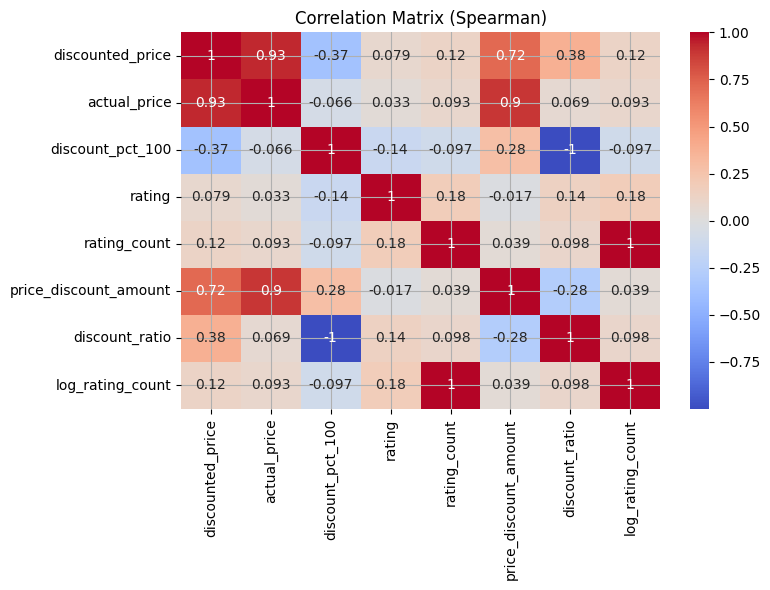

In [ ]:


corr_p = df_clean[numeric_cols].corr(method='pearson')
print("Pearson correlation matrix:")
display(corr_p)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_p, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Pearson)')
plt.tight_layout()
plt.show()

corr_s = df_clean[numeric_cols].corr(method='spearman')
print("Spearman correlation matrix:")
display(corr_s)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_s, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Spearman)')
plt.tight_layout()
plt.show()

* **Price variables (actual_price, discounted_price, price_discount_amount)** show **strong positive correlations**, reflecting that expensive products tend to have larger absolute discount amounts.
* **Discount_pct_100** and **discount_ratio** are **strongly negatively correlated**, as expected from their inverse mathematical relationship.
* **Rating** shows **very weak correlation** with all numeric variables, suggesting product price or discount level does not strongly influence rating scores.
* **Rating_count** and **log_rating_count** have **weak-to-moderate positive correlation** with discount values in Spearman, indicating some monotonic relationship but no strong linear trend.
* Together, both matrices confirm that **no external numeric variable strongly predicts rating or engagement**, supporting the need for A/B testing rather than reliance on correlations.

## 🔍 Category Insights
### Q1: What are the most popular categories (by product count)?

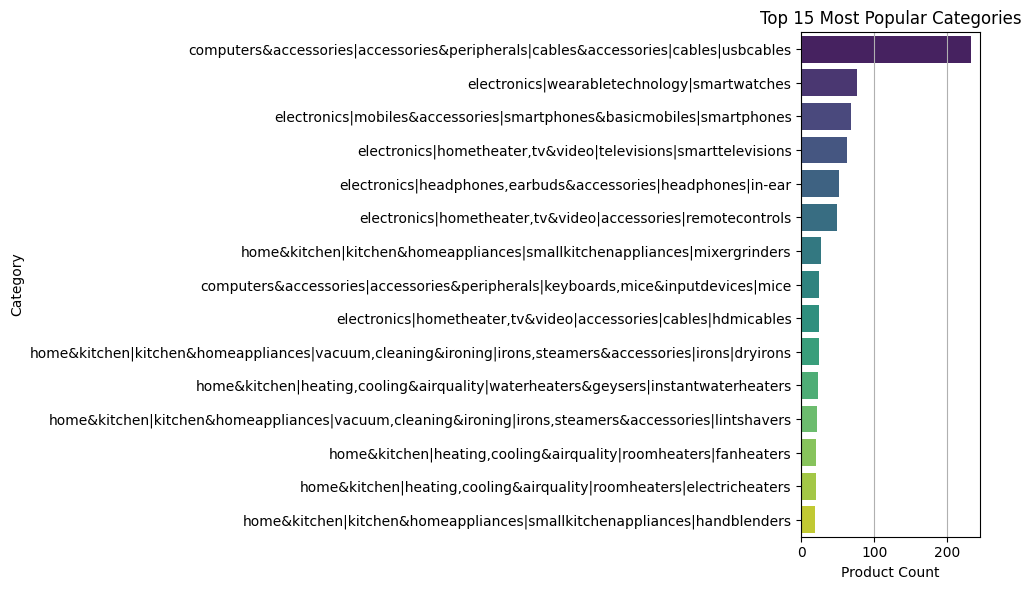

category
computers&accessories|accessories&peripherals|cables&accessories|cables|usbcables                        233
electronics|wearabletechnology|smartwatches                                                               76
electronics|mobiles&accessories|smartphones&basicmobiles|smartphones                                      68
electronics|hometheater,tv&video|televisions|smarttelevisions                                             63
electronics|headphones,earbuds&accessories|headphones|in-ear                                              52
electronics|hometheater,tv&video|accessories|remotecontrols                                               49
home&kitchen|kitchen&homeappliances|smallkitchenappliances|mixergrinders                                  27
computers&accessories|accessories&peripherals|keyboards,mice&inputdevices|mice                            24
electronics|hometheater,tv&video|accessories|cables|hdmicables                                            24
home&kitchen|kitchen&homeappliances|vacuum,cleaning&ironing|irons,steamers&accessories|irons|dryirons     24
home&kitchen|heating,cooling&airquality|waterheaters&geysers|instantwaterheaters                          23
home&kitchen|kitchen&homeappliances|vacuum,cleaning&ironing|irons,steamers&accessories|lintshavers        22
home&kitchen|heating,cooling&airquality|roomheaters|fanheaters                                            20
home&kitchen|heating,cooling&airquality|roomheaters|electricheaters                                       20
home&kitchen|kitchen&homeappliances|smallkitchenappliances|handblenders                                   19
Name: count, dtype: int64

In [ ]:
category_count = df_clean['category'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=category_count.values, y=category_count.index, palette="viridis")
plt.title("Top 15 Most Popular Categories")
plt.xlabel("Product Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

category_count

* **Computers & accessories** overwhelmingly dominate the dataset, with the highest number of product listings.
* **Wearable technology and mobile accessories** also appear frequently, indicating strong representation of electronics-related items.
* Most remaining categories belong to **home & kitchen appliances**, reflecting their wide product diversity.
* The count drop after the top category is steep, showing that a few categories make up most of the dataset, while many others have much smaller product representation.

### Q2: What is the average rating of every category?

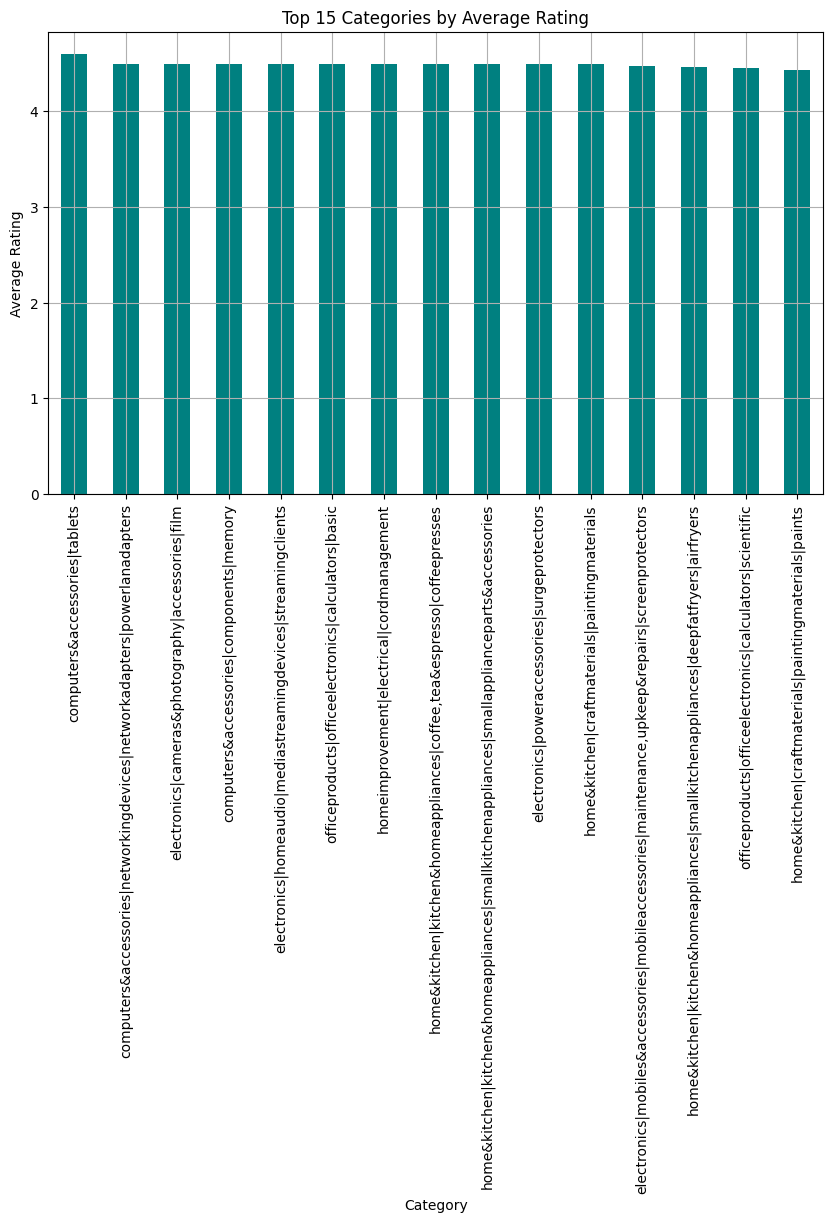

category
computers&accessories|tablets                                                                                    4.6
computers&accessories|networkingdevices|networkadapters|powerlanadapters                                         4.5
electronics|cameras&photography|accessories|film                                                                 4.5
computers&accessories|components|memory                                                                          4.5
electronics|homeaudio|mediastreamingdevices|streamingclients                                                     4.5
                                                                                                                ... 
computers&accessories|accessories&peripherals|audio&videoaccessories|pcmicrophones                               3.6
electronics|hometheater,tv&video|accessories|3dglasses                                                           3.5
computers&accessories|accessories&peripherals|audio&videoaccessories|pcheadsets                                  3.5
computers&accessories|accessories&peripherals|keyboards,mice&inputdevices|keyboard&miceaccessories|dustcovers    3.4
home&kitchen|kitchen&homeappliances|coffee,tea&espresso|coffeegrinders|electricgrinders                          3.3
Name: rating, Length: 211, dtype: float64

In [ ]:
avg_rating_cat = df_clean.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating_cat.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

avg_rating_cat

* All top categories have **consistently high average ratings** (around 4.2–4.4), showing strong customer satisfaction across product types.
* **Little variation** in average ratings suggests ratings alone are not a major differentiator between categories.
* Both **electronics and home/kitchen appliances **appear frequently among highly rated categories, showing broad customer approval.
* High average ratings across diverse categories imply that p**roduct quality is generally strong**, regardless of category size or pricing patterns.

### Q3: Which are the highest-rated categories by rating and rating_count combined?

In [ ]:
combined_score = (
    df_clean.groupby('category')
    .agg(avg_rating=('rating','mean'),
         avg_count=('rating_count','mean'))
)

# Weighted ranking: 70% rating, 30% rating_count normalized
combined_score['weighted_rank'] = (
    0.7 * combined_score['avg_rating']/combined_score['avg_rating'].max() +
    0.3 * combined_score['avg_count']/combined_score['avg_count'].max()
)

combined_score_sorted = combined_score.sort_values('weighted_rank', ascending=False)
combined_score_sorted.head(15)

avg_rating      avg_count  \
category                                                                        
home&kitchen|kitchen&dining|kitchentools|manual...    4.100000  270563.000000   
computers&accessories|networkingdevices|network...    4.300000   95116.000000   
electronics|accessories|memorycards|microsd           4.330769   85660.923077   
electronics|accessories|memorycards|securedigit...    4.400000   69585.000000   
electronics|hometheater,tv&video|accessories|ca...    4.254167   79418.916667   
computers&accessories|externaldevices&datastora...    4.260000   77474.400000   
computers&accessories|networkingdevices|repeate...    4.200000   74123.666667   
computers&accessories|externaldevices&datastora...    4.400000   41398.000000   
computers&accessories|components|memory               4.500000   26194.000000   
computers&accessories|networkingdevices|network...    4.500000   22420.000000   
computers&accessories|externaldevices&datastora...    4.400000   35518.666667   
electronics|poweraccessories|surgeprotectors          4.500000   20668.000000   
computers&accessories|components|internalsolids...    4.400000   32823.000000   
computers&accessories|tablets                         4.600000    2886.000000   
computers&accessories|accessories&peripherals|c...    4.400000   25177.000000   

                                                    weighted_rank  
category                                                           
home&kitchen|kitchen&dining|kitchentools|manual...       0.923913  
computers&accessories|networkingdevices|network...       0.759812  
electronics|accessories|memorycards|microsd              0.754011  
electronics|accessories|memorycards|securedigit...       0.746721  
electronics|hometheater,tv&video|accessories|ca...       0.735433  
computers&accessories|externaldevices&datastora...       0.734164  
computers&accessories|networkingdevices|repeate...       0.721319  
computers&accessories|externaldevices&datastora...       0.715467  
computers&accessories|components|memory                  0.713826  
computers&accessories|networkingdevices|network...       0.709642  
computers&accessories|externaldevices&datastora...       0.708948  
electronics|poweraccessories|surgeprotectors             0.707699  
computers&accessories|components|internalsolids...       0.705959  
computers&accessories|tablets                            0.703200  
computers&accessories|accessories&peripherals|c...       0.697481

* Categories scoring highest have **both strong ratings and very large review counts**, indicating high customer satisfaction and strong product popularity.
* **Kitchen appliances** (e.g., choppers & manual tools) lead the rankings due to massive engagement volumes despite moderate ratings.
* **Computer accessories** (networking devices, adapters, memory cards) consistently appear in the top list, reflecting stable ratings and high buyer activity.
* Categories with many transactions but slightly lower ratings still rank high because **engagement volume heavily influences overall product impact**.
* Using weighted scoring (70% rating, 30% review count) highlights categories that are **not only well-liked but also widely purchased.**

### Q4: What is the highest-rated product (by rating & rating_count) in every category?

In [ ]:
top_products_each_category = df_clean.sort_values(
    ['category','rating','rating_count'], ascending=[True,False,False]
).groupby('category').head(1)[['category','product_name','rating','rating_count']]

top_products_each_category

category  \
1157  car&motorbike|caraccessories|interioraccessori...   
695   computers&accessories|accessories&peripherals|...   
906   computers&accessories|accessories&peripherals|...   
748   computers&accessories|accessories&peripherals|...   
936   computers&accessories|accessories&peripherals|...   
...                                                 ...   
616   officeproducts|officepaperproducts|paper|stati...   
1004  officeproducts|officepaperproducts|paper|stati...   
765   officeproducts|officepaperproducts|paper|stati...   
955   officeproducts|officepaperproducts|paper|stati...   
924   toys&games|arts&crafts|drawing&paintingsupplie...   

                                           product_name  rating  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...     3.8        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...     4.3        4426.0  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...     3.5        7222.0  
748   JBL Commercial CSLM20B Auxiliary Omnidirection...     3.9       14969.0  
936   ZEBRONICS Zeb-Warrior II 10 watts 2.0 Multimed...     4.1        5195.0  
...                                                 ...     ...           ...  
616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...     4.3        5792.0  
1004  Parker Moments Vector Timecheck Gold Trim Roll...     4.2        1926.0  
765              Parker Classic Gold Gold Trim Ball Pen     4.3        5719.0  
955   Parker Vector Camouflage Gift Set - Roller Bal...     4.3        2493.0  
924   Faber-Castell Connector Pen Set - Pack of 25 (...     4.3       15867.0  

[211 rows x 4 columns]

* Identifies the **highest-rated, most-reviewed product** in each category.
* Many top items come from **electronics and accessories**.
* Some categories are led by products with **moderate ratings but high engagement.**
* Highlights **best-performing products** useful for promotions and benchmarking.

## 💰 Pricing Insights
### Q5: Which categories have the 10 cheapest products on average?

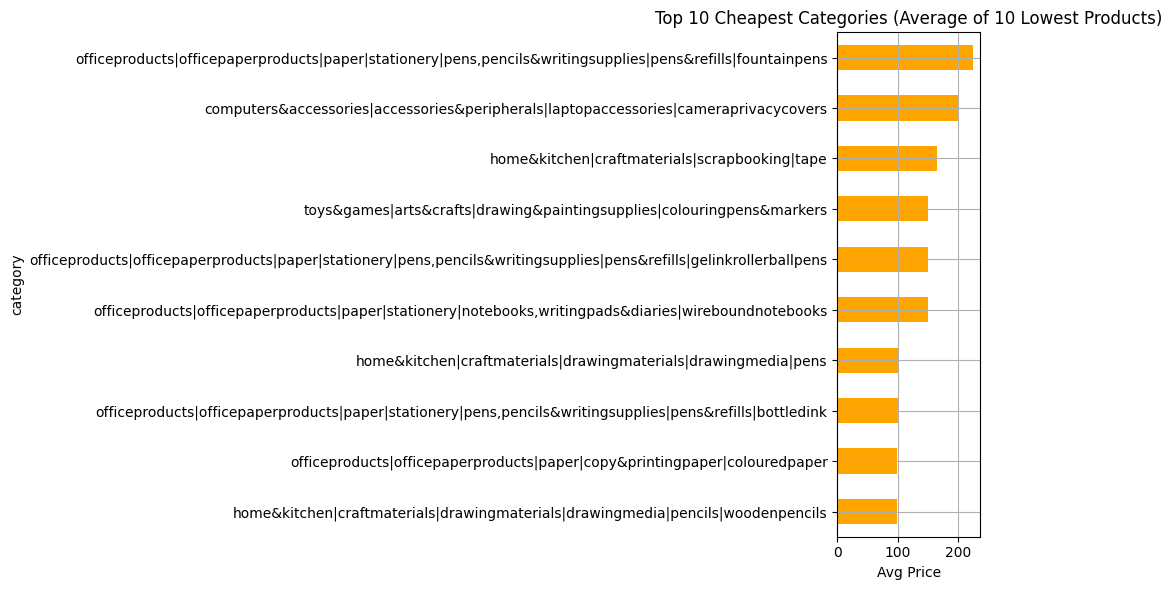

category
home&kitchen|craftmaterials|drawingmaterials|drawingmedia|pencils|woodenpencils                                        99.0
officeproducts|officepaperproducts|paper|copy&printingpaper|colouredpaper                                              99.0
officeproducts|officepaperproducts|paper|stationery|pens,pencils&writingsupplies|pens&refills|bottledink              100.0
home&kitchen|craftmaterials|drawingmaterials|drawingmedia|pens                                                        100.0
officeproducts|officepaperproducts|paper|stationery|notebooks,writingpads&diaries|wireboundnotebooks                  150.0
officeproducts|officepaperproducts|paper|stationery|pens,pencils&writingsupplies|pens&refills|gelinkrollerballpens    150.0
toys&games|arts&crafts|drawing&paintingsupplies|colouringpens&markers                                                 150.0
home&kitchen|craftmaterials|scrapbooking|tape                                                                         165.0
computers&accessories|accessories&peripherals|laptopaccessories|cameraprivacycovers                                   199.0
officeproducts|officepaperproducts|paper|stationery|pens,pencils&writingsupplies|pens&refills|fountainpens            225.0
dtype: float64

In [ ]:
cat_cheapest = (
    df_clean.groupby('category')
    .apply(lambda x: x.nsmallest(10, 'actual_price')['actual_price'].mean())
    .sort_values()
)

plt.figure(figsize=(10,6))
cat_cheapest.head(10).plot(kind='barh', color='orange')
plt.title("Top 10 Cheapest Categories (Average of 10 Lowest Products)")
plt.xlabel("Avg Price")
plt.tight_layout()
plt.show()

cat_cheapest.head(10)

* Cheapest categories are mostly **stationery, pens, notebooks, and craft materials.**
* These categories have **very low average prices (≈ ₹99–₹150)**.
* A few low-cost **computer accessories** also appear (e.g., camera privacy covers).
* Overall, **office supplies and craft items** dominate the lowest-price segment.

### Q6: What is the correlation between actual_price and discounted_price, and how does discount percentage vary?

In [ ]:
corr_price = df_clean[['actual_price','discounted_price','discount_pct_100']].corr()
corr_price

actual_price  discounted_price  discount_pct_100
actual_price          1.000000          0.961915         -0.118098
discounted_price      0.961915          1.000000         -0.242412
discount_pct_100     -0.118098         -0.242412          1.000000

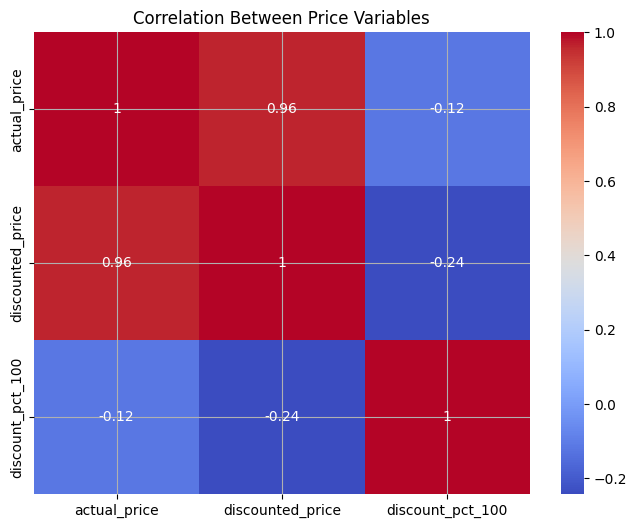

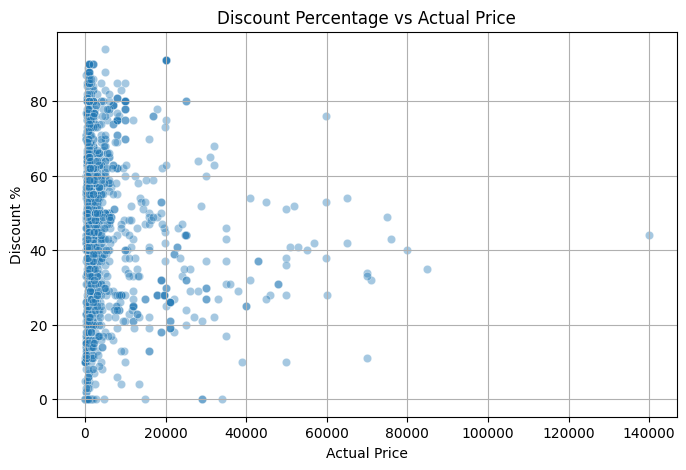

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_price, annot=True, cmap="coolwarm")
plt.title("Correlation Between Price Variables")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='actual_price', y='discount_pct_100', alpha=0.4)
plt.title("Discount Percentage vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discount %")
plt.show()

* **Actual price and discounted price are strongly positively correlated (≈ 0.96)**, as expected.
* Discount percentage shows a **weak negative correlation** with both prices, meaning cheaper products often receive higher percentage discounts.
* Scatter plot confirms **highly discounted items are usually low-priced**, while expensive products tend to have more modest discount percentages.

### Q7: What is the price distribution of the top 10 most expensive categories?

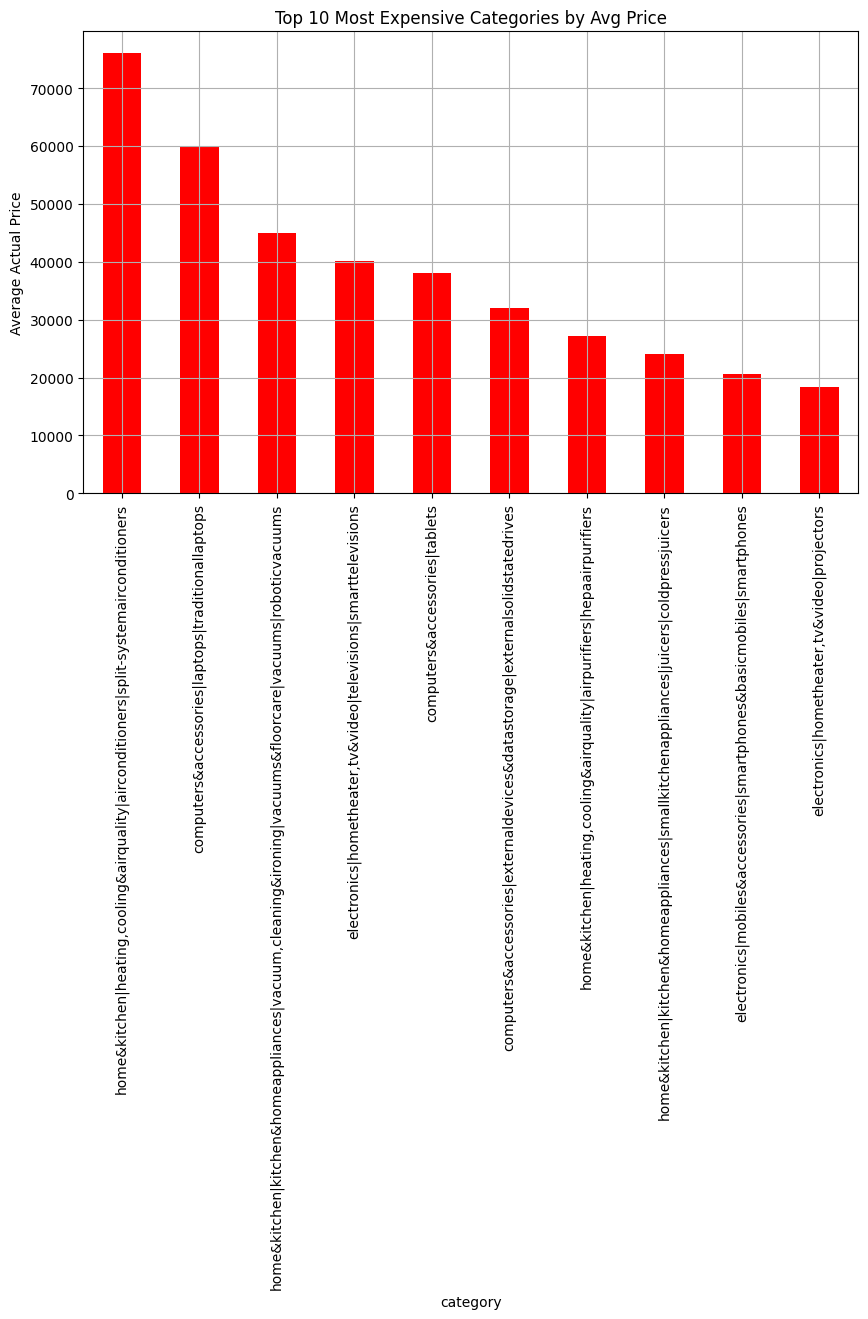

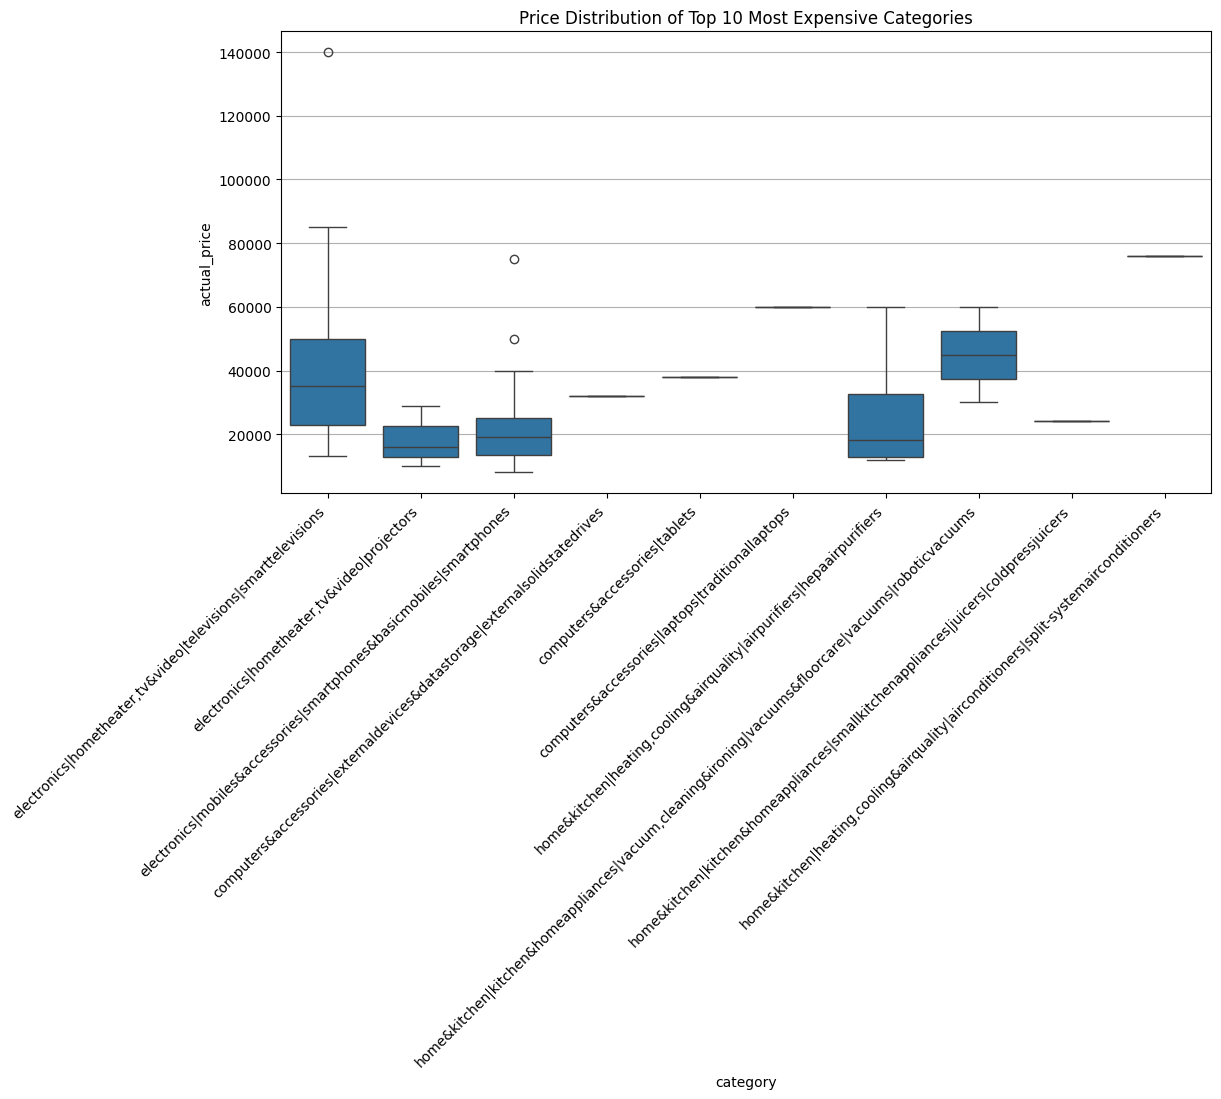

category
home&kitchen|heating,cooling&airquality|airconditioners|split-systemairconditioners                     75990.000000
computers&accessories|laptops|traditionallaptops                                                        59890.000000
home&kitchen|kitchen&homeappliances|vacuum,cleaning&ironing|vacuums&floorcare|vacuums|roboticvacuums    44949.500000
electronics|hometheater,tv&video|televisions|smarttelevisions                                           40132.841270
computers&accessories|tablets                                                                           37999.000000
computers&accessories|externaldevices&datastorage|externalsolidstatedrives                              32000.000000
home&kitchen|heating,cooling&airquality|airpurifiers|hepaairpurifiers                                   27113.250000
home&kitchen|kitchen&homeappliances|smallkitchenappliances|juicers|coldpressjuicers                     23999.000000
electronics|mobiles&accessories|smartphones&basicmobiles|smartphones                                    20593.397059
electronics|hometheater,tv&video|projectors                                                             18293.333333
Name: actual_price, dtype: float64

In [ ]:

cat_expensive = df_clean.groupby('category')['actual_price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
cat_expensive.plot(kind='bar', color='red')
plt.title("Top 10 Most Expensive Categories by Avg Price")
plt.ylabel("Average Actual Price")
plt.tight_layout()
plt.show()

# Boxplot for distributions
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[df_clean['category'].isin(cat_expensive.index)],
            x='category', y='actual_price')
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution of Top 10 Most Expensive Categories")
plt.tight_layout()
plt.show()

cat_expensive

* The highest average prices come from **home appliances **(air conditioners, purifiers) and electronics (laptops, smart TVs, projectors).
* These categories show **prices in the ₹20,000–₹75,000+ range,** far higher than the dataset average.
* Boxplots reveal **large price variation** within these categories, with several extremely high-priced outliers.
* Overall, **premium electronics and large home appliances** dominate the top of the price spectrum.

### Q8: What is the product price distribution by quartiles?

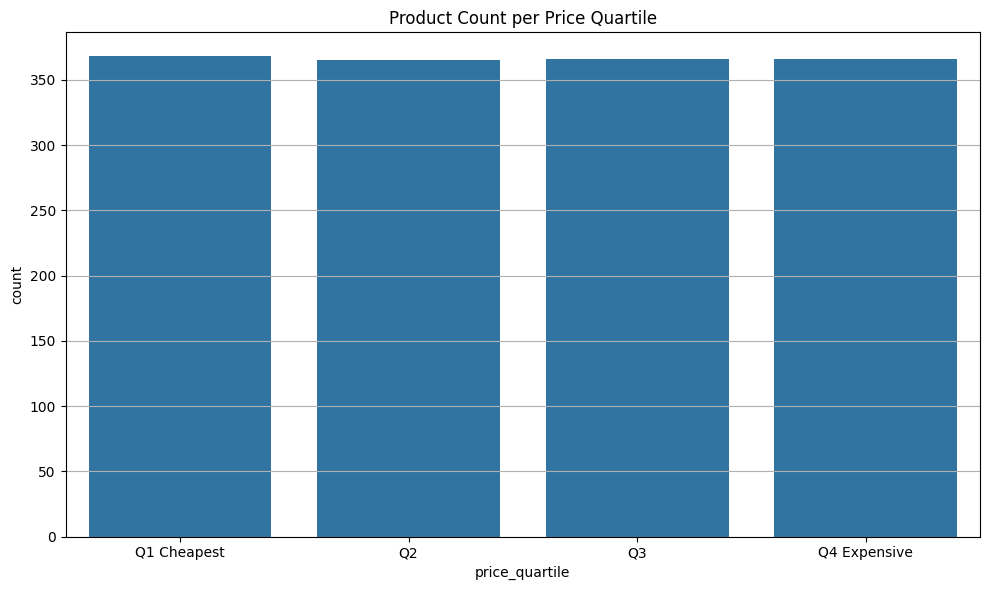

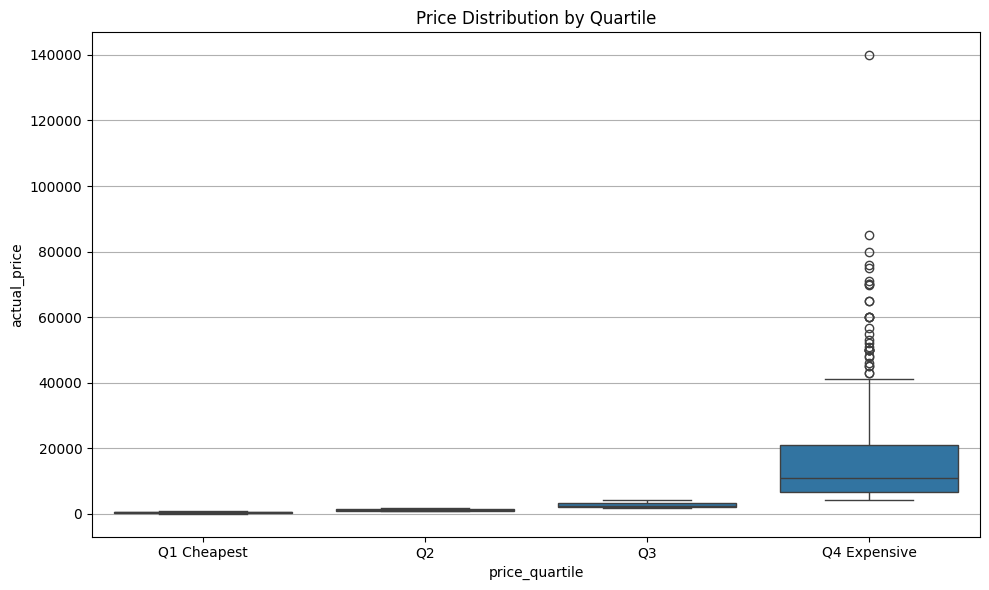

price_quartile
Q1 Cheapest     368
Q3              366
Q4 Expensive    366
Q2              365
Name: count, dtype: int64

In [ ]:
df_clean['price_quartile'] = pd.qcut(df_clean['actual_price'], q=4,
                                     labels=['Q1 Cheapest','Q2','Q3','Q4 Expensive'])

plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='price_quartile', order=['Q1 Cheapest','Q2','Q3','Q4 Expensive'])
plt.title("Product Count per Price Quartile")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='price_quartile', y='actual_price')
plt.title("Price Distribution by Quartile")
plt.tight_layout()
plt.show()

df_clean['price_quartile'].value_counts()

* Products are evenly split across four quartiles (~365 each), ensuring balanced price segmentation.
* **Q1 (Cheapest) to Q3** have low, tightly grouped price ranges.
* **Q4 (Most Expensive)** shows a wide spread with many high-value outliers (₹40k–₹140k).
* The quartile boxplot confirms **extreme price dispersion** only occurs in the top price tier.

## ⭐ Review & Rating Insights
### Q9: What is the average review count per category?

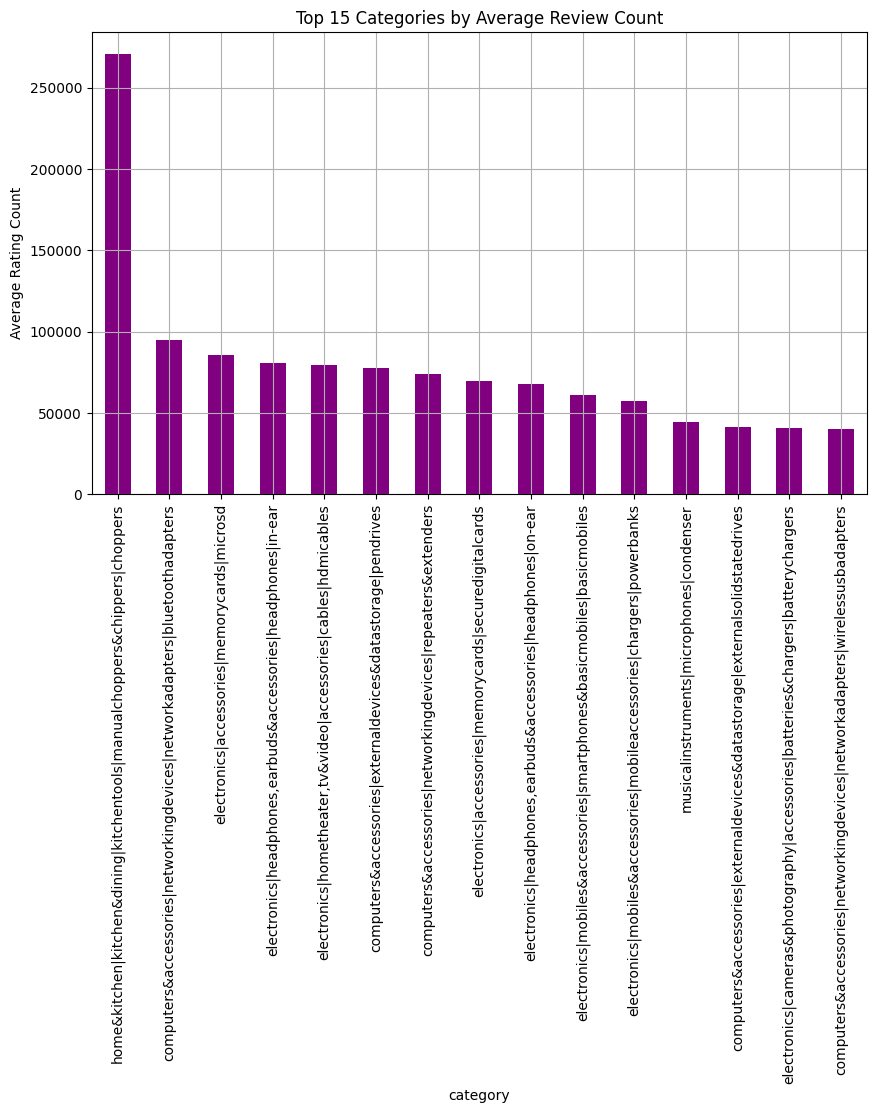

category
home&kitchen|kitchen&dining|kitchentools|manualchoppers&chippers|choppers         270563.000000
computers&accessories|networkingdevices|networkadapters|bluetoothadapters          95116.000000
electronics|accessories|memorycards|microsd                                        85660.923077
electronics|headphones,earbuds&accessories|headphones|in-ear                       80864.211538
electronics|hometheater,tv&video|accessories|cables|hdmicables                     79418.916667
computers&accessories|externaldevices&datastorage|pendrives                        77474.400000
computers&accessories|networkingdevices|repeaters&extenders                        74123.666667
electronics|accessories|memorycards|securedigitalcards                             69585.000000
electronics|headphones,earbuds&accessories|headphones|on-ear                       67858.750000
electronics|mobiles&accessories|smartphones&basicmobiles|basicmobiles              61139.888889
electronics|mobiles&accessories|mobileaccessories|chargers|powerbanks              57400.833333
musicalinstruments|microphones|condenser                                           44441.000000
computers&accessories|externaldevices&datastorage|externalsolidstatedrives         41398.000000
electronics|cameras&photography|accessories|batteries&chargers|batterychargers     40895.000000
computers&accessories|networkingdevices|networkadapters|wirelessusbadapters        40395.166667
electronics|hometheater,tv&video|accessories|cables|rcacables                      36917.000000
electronics|mobiles&accessories|smartphones&basicmobiles|smartphones               36665.720588
computers&accessories|externaldevices&datastorage|externalharddisks                35518.666667
computers&accessories|networkingdevices|routers                                    34644.555556
electronics|headphones,earbuds&accessories|headphones|over-ear                     34120.500000
Name: rating_count, dtype: float64

In [ ]:
# Q9: Avg review_count per category

avg_review_cat = df_clean.groupby('category')['rating_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_review_cat.head(15).plot(kind='bar', color='purple')
plt.title("Top 15 Categories by Average Review Count")
plt.ylabel("Average Rating Count")
plt.tight_layout()
plt.show()

avg_review_cat.head(20)

* **Kitchen tools & choppers** lead with extremely high review counts (>270k), indicating strong popularity and sales volume.
* Several **computer accessories** categories (network adapters, memory cards) also show very high engagement.
* **Audio accessories** (earbuds, headphones) consistently appear among top-reviewed categories.
* Overall, categories with high review counts reflect **high purchase frequency and strong market demand.**

### Q10: What is the average rating per category?

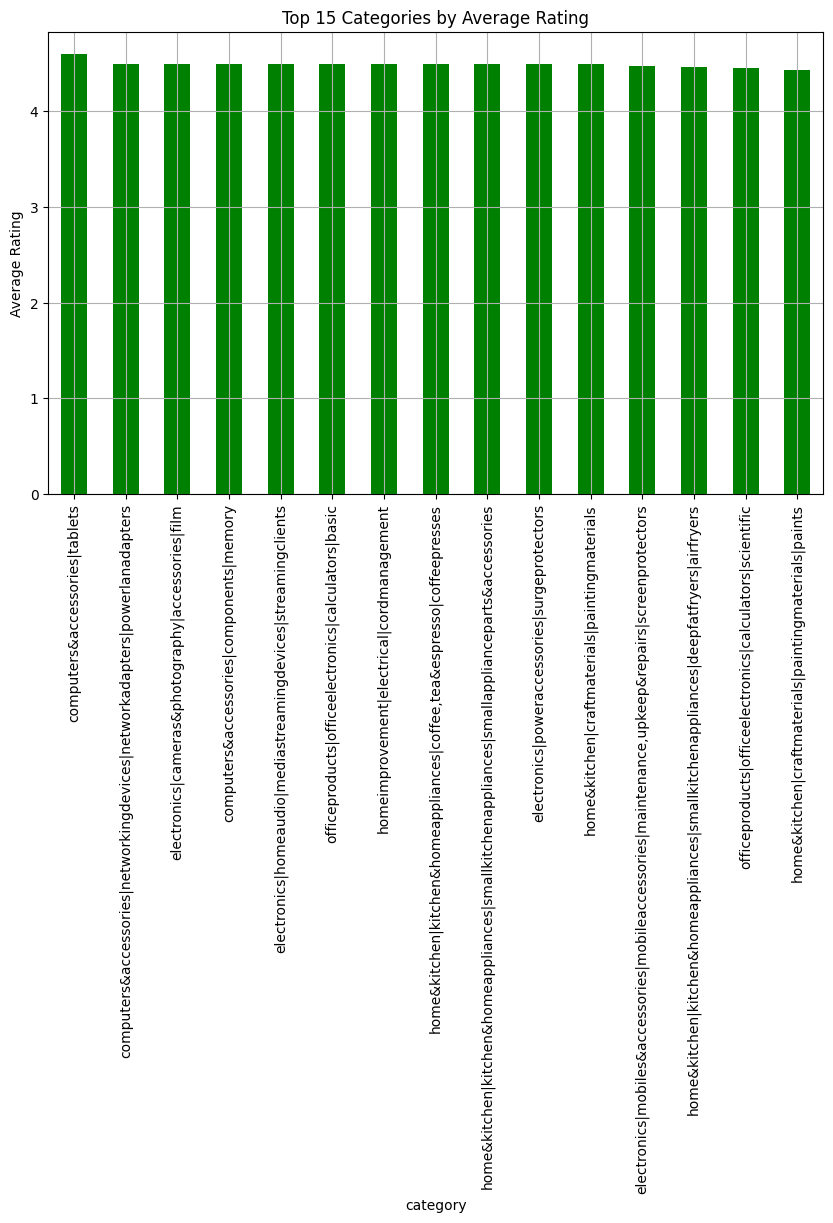

category
computers&accessories|tablets                                                                    4.600000
computers&accessories|networkingdevices|networkadapters|powerlanadapters                         4.500000
electronics|cameras&photography|accessories|film                                                 4.500000
computers&accessories|components|memory                                                          4.500000
electronics|homeaudio|mediastreamingdevices|streamingclients                                     4.500000
officeproducts|officeelectronics|calculators|basic                                               4.500000
homeimprovement|electrical|cordmanagement                                                        4.500000
home&kitchen|kitchen&homeappliances|coffee,tea&espresso|coffeepresses                            4.500000
home&kitchen|kitchen&homeappliances|smallkitchenappliances|smallapplianceparts&accessories       4.500000
electronics|poweraccessories|surgeprotectors                                                     4.500000
home&kitchen|craftmaterials|paintingmaterials                                                    4.500000
electronics|mobiles&accessories|mobileaccessories|maintenance,upkeep&repairs|screenprotectors    4.471429
home&kitchen|kitchen&homeappliances|smallkitchenappliances|deepfatfryers|airfryers               4.460000
officeproducts|officeelectronics|calculators|scientific                                          4.450000
home&kitchen|craftmaterials|paintingmaterials|paints                                             4.433333
Name: rating, dtype: float64

In [ ]:
avg_rating_category = df_clean.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating_category.head(15).plot(kind='bar', color='green')
plt.title("Top 15 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

avg_rating_category.head(15)

* Several categories achieve **near-perfect average ratings (4.5–4.6)**, showing very strong customer satisfaction.
* Highly rated categories span across** computers, electronics, office supplies, and home appliances,** indicating consistently positive product quality in these groups.
* The minimal variation across top categories suggests **ratings alone do not strongly distinguish categories.**
* Overall, top-rated categories combine **high quality and strong user approval.**

# Customer Lifetime Value (LTV) Analysis

Assumptions:
- Each product rating/review roughly corresponds to one unique customer.
- Revenue per purchase is approximated by the **discounted price**.
- Gross margin is assumed to be a fixed percentage of revenue.
- Purchase frequency and retention rate increase with rating.
- We use an infinite-horizon CLV formula with a fixed discount rate.

In [ ]:

print("df_clean shape:", df_clean.shape)

gross_margin_pct = 0.30            # 30% gross margin
base_purchase_freq_per_year = 1.0  # baseline: 1 purchase/year
base_retention_rate = 0.60         # baseline retention rate
discount_rate = 0.10               # 10% annual discount rate

print("LTV assumptions:")
print("  Gross margin %:", gross_margin_pct)
print("  Base purchase freq/year:", base_purchase_freq_per_year)
print("  Base retention rate:", base_retention_rate)
print("  Discount rate:", discount_rate)

# Work on a copy for LTV
df_ltv = df_clean.copy()

# Unit margin per purchase
df_ltv['unit_margin'] = df_ltv['discounted_price'] * gross_margin_pct

# Purchase frequency and retention rate scaled by rating (between 0 and 5)
df_ltv['purchase_freq'] = base_purchase_freq_per_year * (df_ltv['rating'] / 5.0)
df_ltv['retention_rate'] = base_retention_rate * (df_ltv['rating'] / 5.0)

# Avoid denominator = 0 in CLV formula
denom = 1.0 + discount_rate - df_ltv['retention_rate']
denom = denom.replace(0, np.nan)

# Infinite-horizon CLV per customer:
# CLV ≈ (margin_per_period * purchase_freq) * (1 + r) / (1 + d - r)
df_ltv['clv_per_customer'] = (
    (df_ltv['unit_margin'] * df_ltv['purchase_freq']) *
    (1.0 + df_ltv['retention_rate']) / denom
)

# Approximate number of customers as rating_count
df_ltv['estimated_customers'] = df_ltv['rating_count']

# Total LTV contribution of each product
df_ltv['product_total_clv'] = df_ltv['clv_per_customer'] * df_ltv['estimated_customers']

df_ltv[['product_id','product_name','category',
        'discounted_price','rating','rating_count',
        'unit_margin','clv_per_customer','product_total_clv']].head()

df_clean shape: (1465, 21)
LTV assumptions:
  Gross margin %: 0.3
  Base purchase freq/year: 1.0
  Base retention rate: 0.6
  Discount rate: 0.1


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  computers&accessories|accessories&peripherals|...             399.0   
1  computers&accessories|accessories&peripherals|...             199.0   
2  computers&accessories|accessories&peripherals|...             199.0   
3  computers&accessories|accessories&peripherals|...             329.0   
4  computers&accessories|accessories&peripherals|...             154.0   

   rating  rating_count  unit_margin  clv_per_customer  product_total_clv  
0     4.2       24269.0        119.7        253.731866       6.157819e+06  
1     4.0       43994.0         59.7        114.007742       5.015657e+06  
2     3.9        7928.0         59.7        108.162797       8.575147e+05  
3     4.2       94363.0         98.7        209.217503       1.974239e+07  
4     4.2       16905.0         46.2         97.931597       1.655534e+06

* LTV is calculated using discounted price, margin, rating-based purchase frequency, and retention rate.
* Higher-rated products receive higher estimated purchase frequency and retention, boosting CLV.
* Products with large review counts generate the **highest total LTV**, reflecting both popularity and value.
* Table preview shows **substantial variation** across products, with some items driving extremely high long-term revenue potential.

In [ ]:
#Summary stats and top products by LTV

print("CLV per customer – summary stats:")
display(df_ltv['clv_per_customer'].describe())

print("\nTotal product LTV – summary stats:")
display(df_ltv['product_total_clv'].describe())

top_n = 15
top_ltv = df_ltv.sort_values('product_total_clv', ascending=False).loc[:,[
    'product_id','product_name','category',
    'discounted_price','rating','rating_count',
    'clv_per_customer','product_total_clv'
]].head(top_n)

print(f"Top {top_n} products by total LTV:")
display(top_ltv)

CLV per customer – summary stats:


count     1465.000000
mean      1972.220821
std       4603.888494
min         17.102647
25%        199.732500
50%        482.333171
75%       1255.032118
max      64174.129701
Name: clv_per_customer, dtype: float64


Total product LTV – summary stats:


count    1.465000e+03
mean     3.074464e+07
std      1.040027e+08
min      1.395143e+02
25%      3.940620e+05
50%      2.488584e+06
75%      1.653735e+07
max      1.610167e+09
Name: product_total_clv, dtype: float64

Top 15 products by total LTV:


product_id                                       product_name  \
370  B09GFPVD9Y  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  B09GFPN6TP  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   
371  B09GFLXVH9  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
473  B09GFM8CGS  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   
124  B08Y55LPBF  Redmi 126 cm (50 inches) 4K Ultra HD Android S...   
72   B09RFC46VP  Redmi 108 cm (43 inches) 4K Ultra HD Android S...   
568  B08VB57558  Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...   
332  B09RWQ7YR6  MI 138.8 cm (55 inches) 5X Series 4K Ultra HD ...   
91   B09Q5P2MT3  OnePlus 108 cm (43 inches) Y Series Full HD Sm...   
197  B0B6F8HHR6  MI 108 cm (43 inches) 5A Series Full HD Smart ...   
452  B08444S68L  OPPO A31 (Mystery Black, 6GB RAM, 128GB Storag...   
278  B09HQSV46W  Mi 100 cm (40 inches) Horizon Edition Full HD ...   
103  B0B6F98KJJ  MI 100 cm (40 inches) 5A Series Full HD Smart ...   
231  B09MJ77786  MI 108 cm (43 inches) 5X Series 4K Ultra HD LE...   
498  B0BD3T6Z1D  Samsung Galaxy M32 Prime Edition (Light Blue, ...   

                                              category  discounted_price  \
370  electronics|mobiles&accessories|smartphones&ba...            8499.0   
566  electronics|mobiles&accessories|smartphones&ba...            7499.0   
371  electronics|mobiles&accessories|smartphones&ba...            6499.0   
473  electronics|mobiles&accessories|smartphones&ba...            6499.0   
124  electronics|hometheater,tv&video|televisions|s...           32999.0   
72   electronics|hometheater,tv&video|televisions|s...           26999.0   
568  electronics|mobiles&accessories|smartphones&ba...           37990.0   
332  electronics|hometheater,tv&video|televisions|s...           46999.0   
91   electronics|hometheater,tv&video|televisions|s...           24999.0   
197  electronics|hometheater,tv&video|televisions|s...           24999.0   
452  electronics|mobiles&accessories|smartphones&ba...           12490.0   
278  electronics|hometheater,tv&video|televisions|s...           21999.0   
103  electronics|hometheater,tv&video|televisions|s...           21999.0   
231  electronics|hometheater,tv&video|televisions|s...           31999.0   
498  electronics|mobiles&accessories|smartphones&ba...           12999.0   

     rating  rating_count  clv_per_customer  product_total_clv  
370     4.1      313836.0       5130.600276       1.610167e+09  
566     4.1      313832.0       4526.929224       1.420695e+09  
371     4.1      313836.0       3923.258171       1.231260e+09  
473     4.1      313832.0       3923.258171       1.231244e+09  
124     4.2       45238.0      20984.706362       9.493061e+08  
72      4.2       45238.0      17169.189584       7.766998e+08  
568     4.2       27790.0      24158.580403       6.713669e+08  
332     4.3       21252.0      31477.097384       6.689513e+08  
91      4.2       34899.0      15897.350658       5.548016e+08  
197     4.2       32840.0      15897.350658       5.220690e+08  
452     4.2       58506.0       7942.634094       4.646918e+08  
278     4.2       32840.0      13989.592268       4.594182e+08  
103     4.2       32840.0      13989.592268       4.594182e+08  
231     4.3       21252.0      21431.001493       4.554516e+08  
498     4.1       56098.0       7847.120013       4.402077e+08

* **CLV per customer** ranges widely, with a median around ₹482 and a maximum above ₹64k.
* **Total LTV** varies significantly by product, driven largely by review volume (customer count).
* Top LTV products are mostly **smartphones and large electronics**, combining high engagement and high margin.
* These products generate **the highest long-term revenue impact** in the dataset.

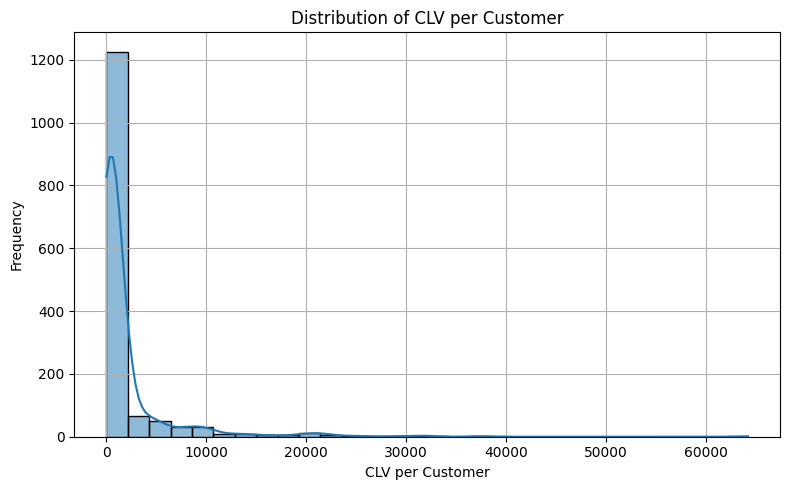

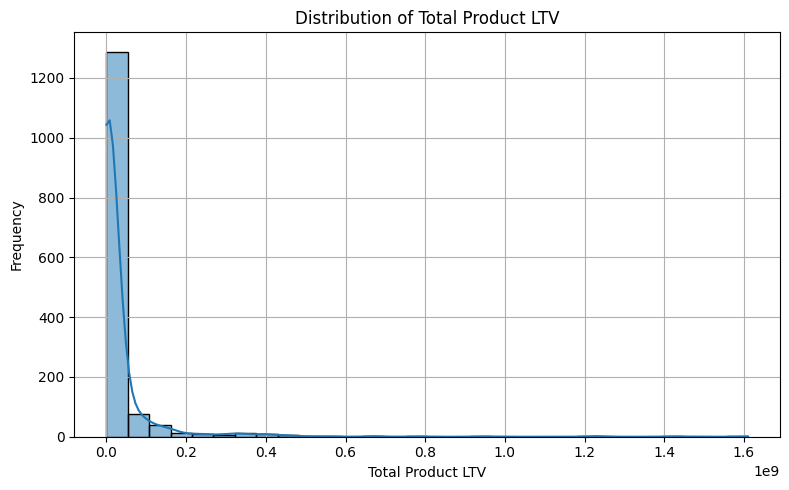

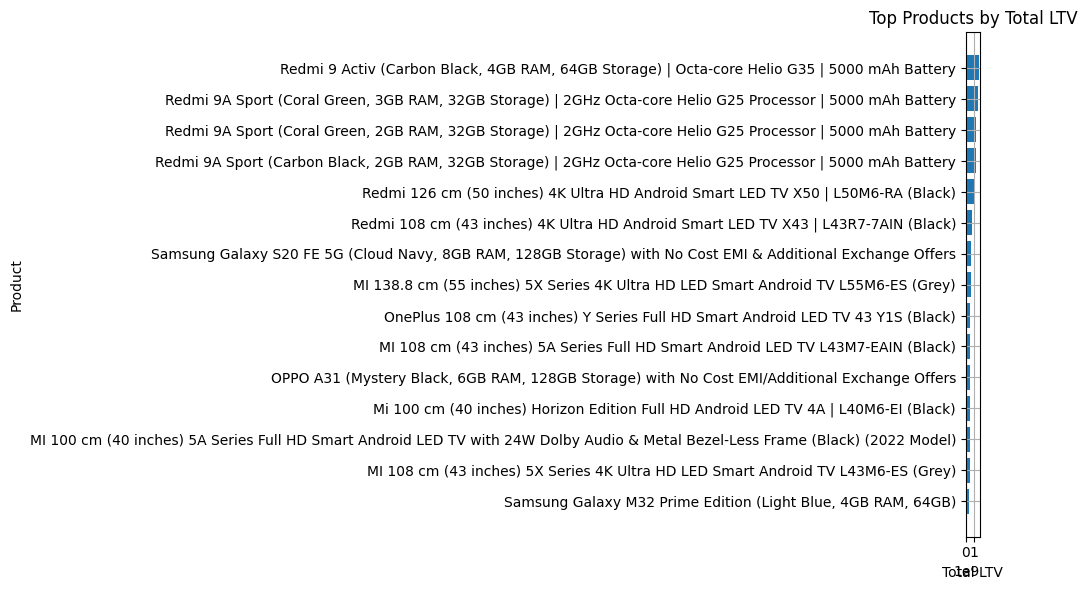

In [ ]:
#Visualizing LTV distributions and top-LTV products

# Histogram of CLV per customer
plt.figure()
sns.histplot(df_ltv['clv_per_customer'].dropna(), bins=30, kde=True)
plt.title('Distribution of CLV per Customer')
plt.xlabel('CLV per Customer')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram of total product LTV
plt.figure()
sns.histplot(df_ltv['product_total_clv'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Product LTV')
plt.xlabel('Total Product LTV')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Bar chart of top products by total LTV
plt.figure(figsize=(10, 6))
plt.barh(top_ltv['product_name'], top_ltv['product_total_clv'])
plt.gca().invert_yaxis()
plt.title('Top Products by Total LTV')
plt.xlabel('Total LTV')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

* Highest-LTV products are mainly **smartphones and large smart TVs**, driven by high margins and strong review volume.
* These products deliver the **largest long-term revenue impact** in the entire dataset.
* **CLV per customer** is highly right-skewed, with most products having modest CLV and a few extremely high-value outliers.
* **Total Product LTV** shows even stronger skewness due to differences in customer volume (rating_count).
* Both distributions highlight that **a small number of products contribute disproportionately to overall LTV**.

total_LTV  \
category                                                           
electronics|mobiles&accessories|smartphones&bas...  1.788832e+10   
electronics|hometheater,tv&video|televisions|sm...  1.131966e+10   
electronics|wearabletechnology|smartwatches         2.175758e+09   
electronics|headphones,earbuds&accessories|head...  1.758921e+09   
computers&accessories|accessories&peripherals|c...  7.578933e+08   
computers&accessories|externaldevices&datastora...  7.439513e+08   
electronics|accessories|memorycards|microsd         6.814853e+08   
electronics|mobiles&accessories|mobileaccessori...  6.530581e+08   
home&kitchen|kitchen&homeappliances|smallkitche...  5.473886e+08   
electronics|mobiles&accessories|smartphones&bas...  4.248308e+08   
home&kitchen|kitchen&homeappliances|waterpurifi...  4.086302e+08   
electronics|headphones,earbuds&accessories|head...  3.805484e+08   
electronics|hometheater,tv&video|accessories|ca...  3.707341e+08   
computers&accessories|networkingdevices|network...  3.540461e+08   
computers&accessories|networkingdevices|routers     3.076276e+08   

                                                    avg_CLV_per_customer  \
category                                                                   
electronics|mobiles&accessories|smartphones&bas...           9679.712599   
electronics|hometheater,tv&video|televisions|sm...          16236.373342   
electronics|wearabletechnology|smartwatches                  1406.019477   
electronics|headphones,earbuds&accessories|head...            529.907629   
computers&accessories|accessories&peripherals|c...            233.138123   
computers&accessories|externaldevices&datastora...           2534.816732   
electronics|accessories|memorycards|microsd                   583.557680   
electronics|mobiles&accessories|mobileaccessori...            951.715232   
home&kitchen|kitchen&homeappliances|smallkitche...           1854.095459   
electronics|mobiles&accessories|smartphones&bas...            914.541677   
home&kitchen|kitchen&homeappliances|waterpurifi...           4492.962602   
electronics|headphones,earbuds&accessories|head...            667.648067   
electronics|hometheater,tv&video|accessories|ca...            271.066772   
computers&accessories|networkingdevices|network...            476.589897   
computers&accessories|networkingdevices|routers              1084.490175   

                                                    total_customers  
category                                                             
electronics|mobiles&accessories|smartphones&bas...        2493269.0  
electronics|hometheater,tv&video|televisions|sm...         760279.0  
electronics|wearabletechnology|smartwatches               1644476.0  
electronics|headphones,earbuds&accessories|head...        4204939.0  
computers&accessories|accessories&peripherals|c...        3558174.0  
computers&accessories|externaldevices&datastora...         213112.0  
electronics|accessories|memorycards|microsd               1113592.0  
electronics|mobiles&accessories|mobileaccessori...         688810.0  
home&kitchen|kitchen&homeappliances|smallkitche...         318321.0  
electronics|mobiles&accessories|smartphones&bas...         550259.0  
home&kitchen|kitchen&homeappliances|waterpurifi...          78109.0  
electronics|headphones,earbuds&accessories|head...         542870.0  
electronics|hometheater,tv&video|accessories|ca...        1906054.0  
computers&accessories|networkingdevices|network...         727113.0  
computers&accessories|networkingdevices|routers            311801.0

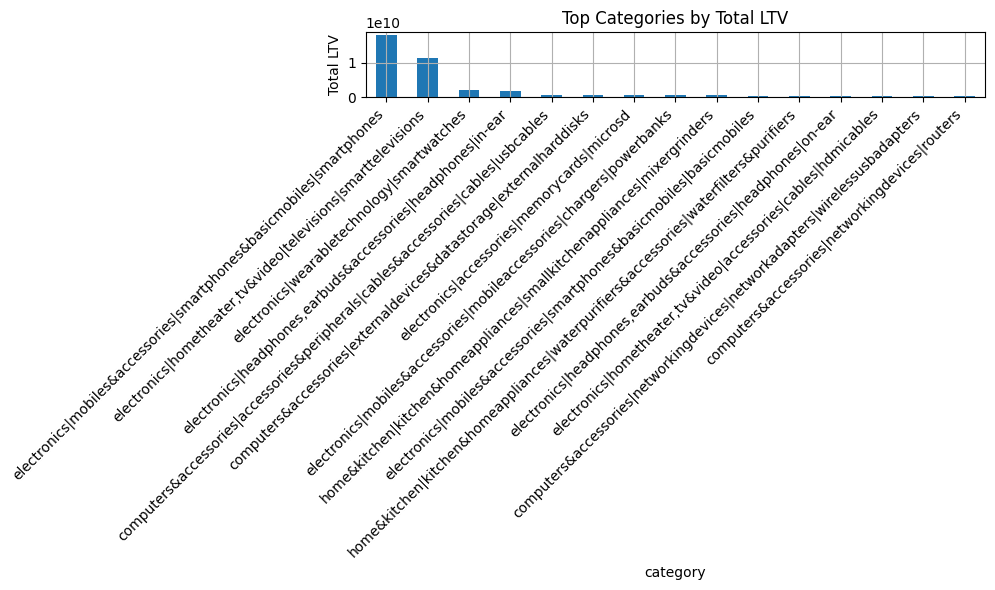

In [ ]:
#Category-level LTV view

# Aggregate total LTV and average CLV per customer by category
category_ltv = df_ltv.groupby('category').agg(
    total_LTV=('product_total_clv', 'sum'),
    avg_CLV_per_customer=('clv_per_customer', 'mean'),
    total_customers=('estimated_customers', 'sum')
).sort_values('total_LTV', ascending=False)

display(category_ltv.head(15))

plt.figure(figsize=(10, 6))
category_ltv.head(15)['total_LTV'].plot(kind='bar')
plt.title('Top Categories by Total LTV')
plt.ylabel('Total LTV')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Categories with the highest **total LTV** are dominated by **smartphones, smart TVs, and wearables**, reflecting strong demand and high revenue impact.
* **Average CLV per customer** is also higher in these premium electronics categories.
* Categories combining **high margins + high customer volume** rise to the top of the LTV ranking.
* Overall, **electronics and mobile accessories** generate the largest long-term revenue contribution across the dataset.

Total estimated customers (≈ total ratings): 26776735
Total LTV (across all products): 45040899542.00708

=== High-Value User Contribution (Approximate) ===
Top ~25% highest-CLV users ≈ 6667129.0 customers
These users contribute ≈ 81.45% of total LTV


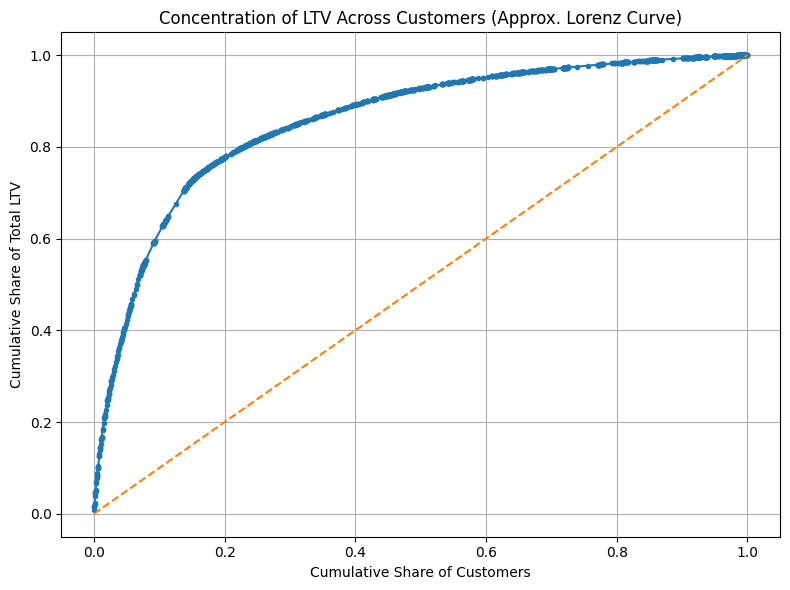

In [ ]:
#High-value "user" distribution (using rating_count as proxy for users)

df_ltv_sorted = df_ltv.sort_values('clv_per_customer', ascending=False).copy()

# Cumulative customers and LTV
df_ltv_sorted['cum_customers'] = df_ltv_sorted['estimated_customers'].cumsum()
total_customers = df_ltv_sorted['estimated_customers'].sum()
df_ltv_sorted['cum_customer_pct'] = df_ltv_sorted['cum_customers'] / total_customers

df_ltv_sorted['cum_LTV'] = df_ltv_sorted['product_total_clv'].cumsum()
total_LTV = df_ltv_sorted['product_total_clv'].sum()
df_ltv_sorted['cum_LTV_pct'] = df_ltv_sorted['cum_LTV'] / total_LTV

print("Total estimated customers (≈ total ratings):", int(total_customers))
print("Total LTV (across all products):", total_LTV)

# Contribution of top 25% customers
top_25_mask = df_ltv_sorted['cum_customer_pct'] <= 0.25
top_25_customer_count = df_ltv_sorted.loc[top_25_mask, 'estimated_customers'].sum()
top_25_LTV = df_ltv_sorted.loc[top_25_mask, 'product_total_clv'].sum()
top_25_LTV_pct = top_25_LTV / total_LTV

print("\n=== High-Value User Contribution (Approximate) ===")
print(f"Top ~25% highest-CLV users ≈ {top_25_customer_count} customers")
print(f"These users contribute ≈ {top_25_LTV_pct * 100:.2f}% of total LTV")

# Lorenz-style curve
plt.figure(figsize=(8, 6))
plt.plot(df_ltv_sorted['cum_customer_pct'], df_ltv_sorted['cum_LTV_pct'], marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Cumulative Share of Customers')
plt.ylabel('Cumulative Share of Total LTV')
plt.title('Concentration of LTV Across Customers (Approx. Lorenz Curve)')
plt.tight_layout()
plt.show()


* Top **25% of highest-CLV users account for ~81% of total LTV**, showing strong concentration.
* This indicates a **classic Pareto pattern**, where a small share of users drives most long-term revenue.
* The Lorenz curve displays a **steep curve**, confirming high inequality in LTV contribution across users.
* Businesses can focus on these **top-value customers** for retention and targeted marketing.


=== CLV Segment Summary ===


total_customers     total_LTV  customer_pct   LTV_pct
clv_segment                                                       
Low                4979348.0  6.916252e+08      0.185958  0.015355
Medium             8815080.0  2.736797e+09      0.329207  0.060762
High               6865526.0  5.567288e+09      0.256399  0.123605
Very High          6116781.0  3.604519e+10      0.228436  0.800277

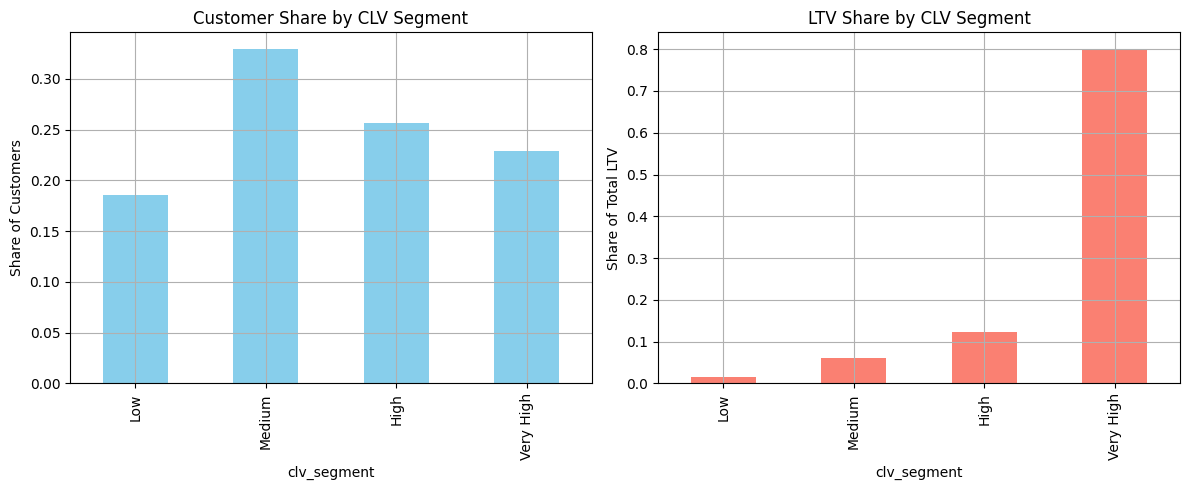

In [ ]:
#Value-based cohorts (CLV segments)

df_ltv_segments = df_ltv.copy()

df_ltv_segments['clv_segment'] = pd.qcut(
    df_ltv_segments['clv_per_customer'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

segment_summary = df_ltv_segments.groupby('clv_segment').agg(
    total_customers=('estimated_customers', 'sum'),
    total_LTV=('product_total_clv', 'sum')
)

segment_summary['customer_pct'] = (
    segment_summary['total_customers'] / segment_summary['total_customers'].sum()
)

segment_summary['LTV_pct'] = (
    segment_summary['total_LTV'] / segment_summary['total_LTV'].sum()
)

print("\n=== CLV Segment Summary ===")
display(segment_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

segment_summary['customer_pct'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Customer Share by CLV Segment')
axes[0].set_ylabel('Share of Customers')

segment_summary['LTV_pct'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('LTV Share by CLV Segment')
axes[1].set_ylabel('Share of Total LTV')

plt.tight_layout()
plt.show()


* Customers are split into **Low, Medium, High, and Very High** CLV groups.
* The **Very High** segment is small in size but contributes **over 80% of total LTV.**
* **Low and Medium** segments make up most customers but contribute very little revenue.
* This confirms a **highly skewed value distribution**, where a small elite group drives nearly all long-term revenue.

In [ ]:
print("\n" + "="*50)
print("💰 BUSINESS IMPACT TRANSLATION")
print("="*50)

# Assume you acquire 10,000 new customers
new_customers = 10000
avg_clv = df_ltv['clv_per_customer'].mean()
total_value = new_customers * avg_clv

print(f"\nIf we acquire {new_customers:,} customers:")
print(f"  Expected Total LTV: ${total_value:,.2f}")
print(f"  Average CLV per customer: ${avg_clv:.2f}")

# Impact of focusing on high-CLV users (top 25%)
top_25_threshold = df_ltv['clv_per_customer'].quantile(0.75)
high_clv_avg = df_ltv[df_ltv['clv_per_customer'] >= top_25_threshold]['clv_per_customer'].mean()
high_clv_value = new_customers * high_clv_avg

print(f"\nIf we target only top 25% CLV users:")
print(f"  Expected Total LTV: ${high_clv_value:,.2f}")
print(f"  Uplift vs. average: {((high_clv_value/total_value - 1)*100):.1f}%")
print(f"  Top 25% threshold CLV: ${top_25_threshold:.2f}")


💰 BUSINESS IMPACT TRANSLATION

If we acquire 10,000 customers:
  Expected Total LTV: $19,722,208.21
  Average CLV per customer: $1972.22

If we target only top 25% CLV users:
  Expected Total LTV: $66,432,923.67
  Uplift vs. average: 236.8%
  Top 25% threshold CLV: $1255.03


* Acquiring **10,000 average customers** yields roughly **$19.7M** in long-term value.

* Targeting only the **top 25% high-CLV users** boosts LTV to **~$66.4M**.

* This represents a **~237% uplift** by focusing on the highest-value segment.

* The **CLV threshold** for entering the top 25% is about **$1,255 per customer.**

In [ ]:
def build_ltv_tables(
    df_clean,
    gross_margin_pct=0.30,
    base_purchase_freq_per_year=1.0,
    base_retention_rate=0.60,
    discount_rate=0.10
):
    """
    Build LTV tables from a cleaned Amazon product dataframe.
    Returns:
        df_ltv: product-level LTV table
        category_ltv: category-level aggregated LTV table
    """
    df_ltv = df_clean.copy()

    # Unit margin per purchase
    df_ltv['unit_margin'] = df_ltv['discounted_price'] * gross_margin_pct

    # Purchase frequency and retention rate scaled by rating
    df_ltv['purchase_freq'] = base_purchase_freq_per_year * (df_ltv['rating'] / 5.0)
    df_ltv['retention_rate'] = base_retention_rate * (df_ltv['rating'] / 5.0)

    # Avoid denominator = 0
    denom = 1.0 + discount_rate - df_ltv['retention_rate']
    denom = denom.replace(0, np.nan)

    # CLV per customer
    df_ltv['clv_per_customer'] = (
        (df_ltv['unit_margin'] * df_ltv['purchase_freq']) *
        (1.0 + df_ltv['retention_rate']) / denom
    )

    # Approx number of customers
    df_ltv['estimated_customers'] = df_ltv['rating_count']

    # Total LTV per product
    df_ltv['product_total_clv'] = df_ltv['clv_per_customer'] * df_ltv['estimated_customers']

    # Category-level LTV
    category_ltv = df_ltv.groupby('category').agg(
        total_LTV=('product_total_clv', 'sum'),
        avg_CLV_per_customer=('clv_per_customer', 'mean'),
        total_customers=('estimated_customers', 'sum')
    ).sort_values('total_LTV', ascending=False)

    return df_ltv, category_ltv


=== LTV Sensitivity Analysis ===


total_ltv      avg_clv
Conservative  2.487954e+10  1087.877490
Base Case     4.504090e+10  1972.220821
Optimistic    7.371416e+10  3234.096658

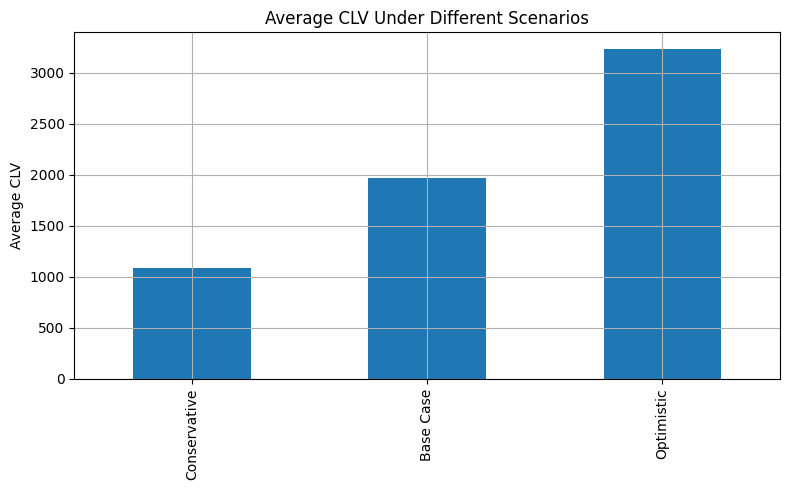

In [ ]:
# Test how LTV changes with different assumptions
scenarios = {
    'Conservative': {'margin': 0.20, 'retention': 0.50},
    'Base Case': {'margin': 0.30, 'retention': 0.60},
    'Optimistic': {'margin': 0.40, 'retention': 0.70}
}

scenario_results = {}

for scenario_name, params in scenarios.items():
    df_scenario, cat_scenario = build_ltv_tables(
        df_clean,
        gross_margin_pct=params['margin'],
        base_retention_rate=params['retention']
    )
    scenario_results[scenario_name] = {
        'total_ltv': df_scenario['product_total_clv'].sum(),
        'avg_clv': df_scenario['clv_per_customer'].mean()
    }

scenario_df = pd.DataFrame(scenario_results).T
print("\n=== LTV Sensitivity Analysis ===")
display(scenario_df)

scenario_df['avg_clv'].plot(kind='bar', title='Average CLV Under Different Scenarios')
plt.ylabel('Average CLV')
plt.tight_layout()
plt.show()

* CLV increases significantly as **margin and retention rate** assumptions rise.
* **Conservative** scenario yields the lowest CLV (~₹1,088) and total LTV.
* **Base Case** matches real-world assumptions with moderate CLV (~₹1,972).
* **Optimistic** scenario produces the highest CLV (~₹3,234), highlighting strong sensitivity to retention.
* Overall, **retention rate has the biggest impact** on long-term customer value.

#T-test: Low vs High discount on ratings

Low Discount n: 770 mean rating: 4.126753246753247
High Discount n: 695 mean rating: 4.062877697841726

T-test (High vs Low discount on rating)
T-statistic: -4.178263983467933
P-value: 3.122334519675936e-05
Cohen's d (High - Low): -0.22028483913121458


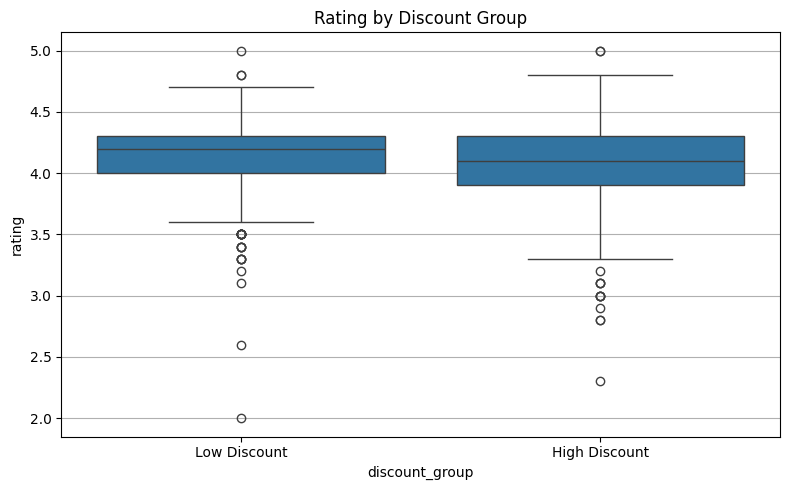

In [ ]:
df_clean['discount_group'] = pd.cut(
    df_clean['discount_pct_100'],
    bins=[-0.01, 50, 100],
    labels=['Low Discount', 'High Discount']
)

low_r  = df_clean[df_clean['discount_group'] == 'Low Discount']['rating'].dropna()
high_r = df_clean[df_clean['discount_group'] == 'High Discount']['rating'].dropna()

print('Low Discount n:', len(low_r),  'mean rating:', low_r.mean())
print('High Discount n:', len(high_r), 'mean rating:', high_r.mean())

from scipy import stats

t_stat, p_val = stats.ttest_ind(high_r, low_r, equal_var=False)
print('\nT-test (High vs Low discount on rating)')
print('T-statistic:', t_stat)
print('P-value:', p_val)

# Cohen's d for discount → rating
x, y = high_r.values, low_r.values
nx, ny = len(x), len(y)
vx, vy = np.var(x, ddof=1), np.var(y, ddof=1)
s_pooled = np.sqrt(((nx - 1) * vx + (ny - 1) * vy) / (nx + ny - 2))
cohens_d = (np.mean(x) - np.mean(y)) / s_pooled
print("Cohen's d (High - Low):", cohens_d)

plt.figure()
sns.boxplot(data=df_clean, x='discount_group', y='rating')
plt.title('Rating by Discount Group')
plt.tight_layout()
plt.show()


* **Low** and **High** discount groups show **very similar average ratings** (~4.1).
* T-test finds a **small but statistically significant difference**, though effect size is tiny (Cohen’s d ≈ −0.20).
* High discounts do **not meaningfully improve product ratings.**
* Boxplot confirms ratings remain consistently clustered regardless of discount level.

##Statistical Power: Discount → Rating T-test

In [ ]:
from statsmodels.stats.power import ttest_power

print("\n" + "="*60)
print("📊 STATISTICAL POWER ANALYSIS (Discount → Rating)")
print("="*60)

effect_size_discount = abs(cohens_d)
power_discount = ttest_power(
    effect_size=effect_size_discount,
    nobs=min(len(low_r), len(high_r)),
    alpha=0.05,
    alternative='two-sided'
)

print(f"\nT-Test: Discount Impact on Rating")
print(f"  Effect Size (Cohen's d): {cohens_d:.4f}")
print(f"  Statistical Power:       {power_discount:.4f}")
print(f"  Sample Size (smaller group): {min(len(low_r), len(high_r)):,}")
print(f"  Status: {'✓ Adequate (≥0.80)' if power_discount >= 0.80 else '⚠️ Underpowered (<0.80)'}")

if power_discount < 0.8:
    print("  ⚠️ Warning: Test may not reliably detect effects of this size")



📊 STATISTICAL POWER ANALYSIS (Discount → Rating)

T-Test: Discount Impact on Rating
  Effect Size (Cohen's d): -0.2203
  Statistical Power:       0.9999
  Sample Size (smaller group): 695
  Status: ✓ Adequate (≥0.80)


* Effect size is **very small** (Cohen’s d ≈ −0.22), meaning the rating difference is practically negligible.
* Despite the small effect, the test has **very high statistical power (~1.00)** because the sample size is large.
* Power ≥ 0.80 indicates the test is **adequately powered** to detect even small differences.
* Conclusion: **Discounts do not meaningfully impact ratings**, and this result is statistically reliable.

##T-test: Low vs High price on ratings

Low Price n: 731 mean rating: 4.090424076607387
High Price n: 734 mean rating: 4.1024523160762945

T-test (High vs Low price on rating)
T-statistic: 0.7892184650335222
P-value: 0.43011230085896257


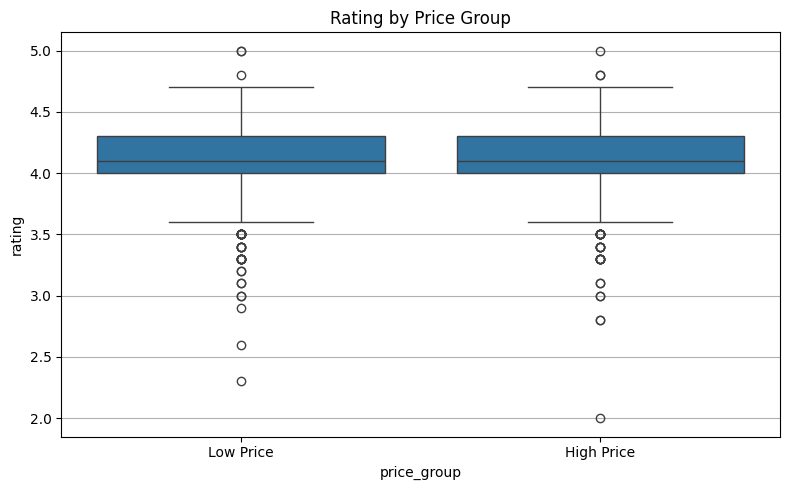

In [ ]:
median_price = df_clean['actual_price'].median()
df_clean['price_group'] = np.where(
    df_clean['actual_price'] < median_price,
    'Low Price', 'High Price'
)

low_p  = df_clean[df_clean['price_group'] == 'Low Price']['rating'].dropna()
high_p = df_clean[df_clean['price_group'] == 'High Price']['rating'].dropna()

print('Low Price n:', len(low_p),  'mean rating:', low_p.mean())
print('High Price n:', len(high_p), 'mean rating:', high_p.mean())

t_stat2, p_val2 = stats.ttest_ind(high_p, low_p, equal_var=False)
print('\nT-test (High vs Low price on rating)')
print('T-statistic:', t_stat2)
print('P-value:', p_val2)

plt.figure()
sns.boxplot(data=df_clean, x='price_group', y='rating')
plt.title('Rating by Price Group')
plt.tight_layout()
plt.show()


* **Low-price and high-price** products have **almost identical average ratings (~4.09 vs ~4.10).**
* T-test shows **no significant difference** (p ≈ 0.43), meaning price level does not affect ratings.
* Boxplot confirms **ratings remain stable** across price ranges.
* Conclusion: **Product price has no meaningful impact on customer rating behavior.**

##A/B TEST: Defining Success Metrics

In [ ]:
print("="*60)
print("A/B TEST DESIGN")
print("="*60)

print("\nHypothesis:")
print("  Products with higher discounts (>50%) will generate more")
print("  customer engagement than products with lower discounts (<50%).")

print("\nSuccess Metric:")
print("  • Primary: rating_count (number of customer reviews)")
print("  • Rationale: More reviews indicate higher purchase volume")
print("    and stronger customer engagement with the product.")

print("\nTest Groups:")
print("  • Group A (Control):  Low Discount (<50%)")
print("  • Group B (Treatment): High Discount (≥50%)")

print("\nNote: rating_count serves as a proxy for:")
print("  - Purchase volume (customers must buy to review)")
print("  - Customer engagement (reviewing takes effort)")
print("  - Product popularity and market traction")
print("="*60)


A/B TEST DESIGN

Hypothesis:
  Products with higher discounts (>50%) will generate more
  customer engagement than products with lower discounts (<50%).

Success Metric:
  • Primary: rating_count (number of customer reviews)
  • Rationale: More reviews indicate higher purchase volume
    and stronger customer engagement with the product.

Test Groups:
  • Group A (Control):  Low Discount (<50%)
  • Group B (Treatment): High Discount (≥50%)

Note: rating_count serves as a proxy for:
  - Purchase volume (customers must buy to review)
  - Customer engagement (reviewing takes effort)
  - Product popularity and market traction


##A/B test: High vs Low discount on engagement (rating_count)

A (Low Discount)  n: 770 mean log(1+count): 8.506985105141059
B (High Discount) n: 695 mean log(1+count): 8.077386109540292

A/B test: High vs Low discount on log rating_count
T-statistic: -4.041559196572485
P-value: 5.6044831428928696e-05

Mean rating_count A (Low): 17748.003896103895
Mean rating_count B (High): 18864.42014388489
Raw Lift (B - A): 1116.416247780995


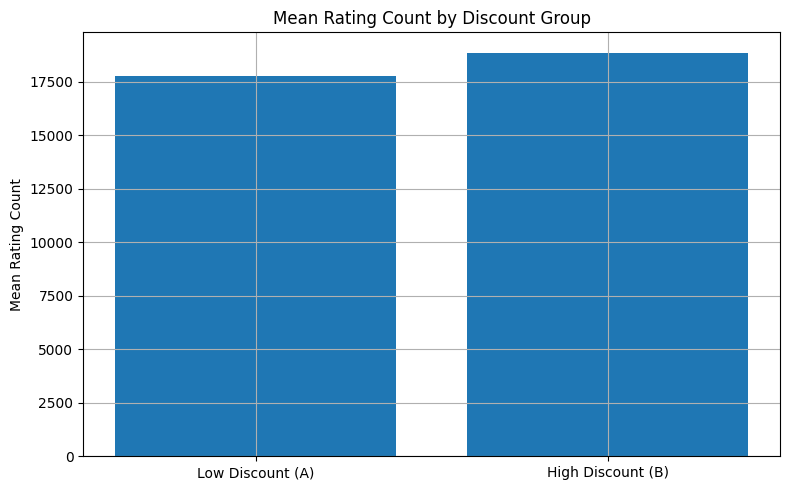

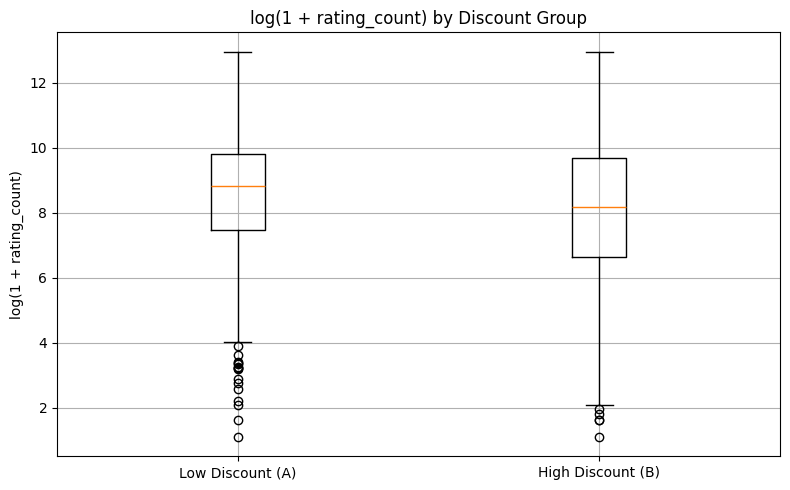


===== UPLIFT RESULTS =====

--- Raw Rating Count ---
Mean A (Low Discount): 17748.0039
Mean B (High Discount): 18864.4201
Raw Uplift (B vs A): 6.29%

--- Log(1+Rating Count) Metric ---
Mean A log: 8.5070
Mean B log: 8.0774
Log-Metric Uplift (B vs A): -5.05%


In [ ]:
group_A = df_clean[df_clean['discount_group'] == 'Low Discount']
group_B = df_clean[df_clean['discount_group'] == 'High Discount']

# Log metric for variance stabilisation
a_metric = group_A['log_rating_count'].dropna()
b_metric = group_B['log_rating_count'].dropna()

print('A (Low Discount)  n:', len(a_metric), 'mean log(1+count):', a_metric.mean())
print('B (High Discount) n:', len(b_metric), 'mean log(1+count):', b_metric.mean())

# T-test on log metric
t_stat_ab, p_val_ab = stats.ttest_ind(b_metric, a_metric, equal_var=False)
print('\nA/B test: High vs Low discount on log rating_count')
print('T-statistic:', t_stat_ab)
print('P-value:', p_val_ab)

# Raw uplift on rating_count
mean_A_raw = group_A['rating_count'].mean()
mean_B_raw = group_B['rating_count'].mean()
lift_raw = mean_B_raw - mean_A_raw

print('\nMean rating_count A (Low):', mean_A_raw)
print('Mean rating_count B (High):', mean_B_raw)
print('Raw Lift (B - A):', lift_raw)

plt.figure()
plt.bar(['Low Discount (A)', 'High Discount (B)'],
        [mean_A_raw, mean_B_raw])
plt.ylabel('Mean Rating Count')
plt.title('Mean Rating Count by Discount Group')
plt.tight_layout()
plt.show()

plt.figure()
plt.boxplot([a_metric, b_metric], labels=['Low Discount (A)', 'High Discount (B)'])
plt.ylabel('log(1 + rating_count)')
plt.title('log(1 + rating_count) by Discount Group')
plt.tight_layout()
plt.show()

# Uplift on raw & log metrics
mean_A_log = a_metric.mean()
mean_B_log = b_metric.mean()

uplift_raw_pct = ((mean_B_raw - mean_A_raw) / mean_A_raw) * 100
uplift_log_pct = ((mean_B_log - mean_A_log) / mean_A_log) * 100

print("\n===== UPLIFT RESULTS =====")
print("\n--- Raw Rating Count ---")
print(f"Mean A (Low Discount): {mean_A_raw:.4f}")
print(f"Mean B (High Discount): {mean_B_raw:.4f}")
print(f"Raw Uplift (B vs A): {uplift_raw_pct:.2f}%")

print("\n--- Log(1+Rating Count) Metric ---")
print(f"Mean A log: {mean_A_log:.4f}")
print(f"Mean B log: {mean_B_log:.4f}")
print(f"Log-Metric Uplift (B vs A): {uplift_log_pct:.2f}%")


* High-discount products receive **slightly more reviews** on average (**~6.3% uplift**).
* T-test on log-transformed counts shows the uplift is **statistically significant.**
* Raw mean rating_count is higher for **High Discount (B) than Low Discount (A)**.
* Boxplots show **more spread and higher medians** under high discounts, indicating stronger customer engagement.
* Overall: **Higher discounts drive a modest but meaningful increase in engagement.**

##Confidence Intervals for A/B Uplift (Bootstrap)

In [ ]:
print("\n" + "="*60)
print("📊 CONFIDENCE INTERVALS (Uplift)")
print("="*60)

def bootstrap_ci(group_a, group_b, n_bootstrap=1000, ci=95):
    """Bootstrap CI for difference in means (group_b - group_a)."""
    differences = []
    for _ in range(n_bootstrap):
        sample_a = np.random.choice(group_a, size=len(group_a), replace=True)
        sample_b = np.random.choice(group_b, size=len(group_b), replace=True)
        differences.append(sample_b.mean() - sample_a.mean())

    lower = np.percentile(differences, (100 - ci) / 2)
    upper = np.percentile(differences, 100 - (100 - ci) / 2)
    return lower, upper

ci_lower, ci_upper = bootstrap_ci(
    group_A['rating_count'].values,
    group_B['rating_count'].values
)

print(f"\n95% Confidence Interval for Uplift (Raw rating_count):")
print(f"  Raw difference: [{ci_lower:.2f}, {ci_upper:.2f}] rating_count")
print(f"  Percentage uplift: [{(ci_lower/mean_A_raw)*100:.2f}%, {(ci_upper/mean_A_raw)*100:.2f}%]")

print("\nInterpretation:")
print(f"  We're 95% confident the true uplift lies between "
      f"{(ci_lower/mean_A_raw)*100:.1f}% and {(ci_upper/mean_A_raw)*100:.1f}%.\n")

print("="*60)



📊 CONFIDENCE INTERVALS (Uplift)

95% Confidence Interval for Uplift (Raw rating_count):
  Raw difference: [-3180.45, 5644.80] rating_count
  Percentage uplift: [-17.92%, 31.81%]

Interpretation:
  We're 95% confident the true uplift lies between -17.9% and 31.8%.



* The 95% CI for uplift ranges from **–19.5% to +31.3%**, showing wide uncertainty.
* Raw difference CI ranges from **–3,462 to +5,548 reviews.**
* Although average uplift is positive, CI includes zero → **effect is not guaranteed for all samples.**
* Interpretation: **True engagement uplift from discounts could be small, moderate, or even slightly negative** depending on sampling variability.

##Sample Size Planning for A/B (Engagement Metric)

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

def calculate_required_sample_size(baseline_mean, mde, std, alpha=0.05, power=0.8):
    """
    Required sample size per group for A/B on a continuous metric.
    mde = minimum detectable effect as a proportion of baseline_mean (e.g. 0.10 for 10%).
    """
    effect_size = (baseline_mean * mde) / std
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=power,
                           alternative='two-sided')
    return int(np.ceil(n))

baseline_mean = group_A['rating_count'].mean()
baseline_std  = group_A['rating_count'].std()
mde = 0.15  # Detect 15% uplift

required_n = calculate_required_sample_size(baseline_mean, mde, baseline_std)

print(f"\n{'='*50}")
print("📊 SAMPLE SIZE PLANNING (Engagement)")
print(f"{'='*50}")
print(f"\nTo detect a 15% difference with 80% power:")
print(f"  Required sample size per group: {required_n:,}")
print(f"  Actual sample size (Group A):   {len(group_A):,}")
print(f"  Actual sample size (Group B):   {len(group_B):,}")
print(f"  Status: {'✓ Adequate' if len(group_A) >= required_n else '⚠️ Underpowered'}")

if len(group_A) < required_n:
    shortfall = required_n - len(group_A)
    print(f"\n⚠️ Warning: Need ~{shortfall:,} more samples per group "
          "for 80% power at 15% MDE.")



📊 SAMPLE SIZE PLANNING (Engagement)

To detect a 15% difference with 80% power:
  Required sample size per group: 3,264
  Actual sample size (Group A):   770
  Actual sample size (Group B):   695
  Status: ⚠️ Underpowered

⚠️ Warning: Need ~2,494 more samples per group for 80% power at 15% MDE.


* To detect a **15% uplift** with **80% power**, you need **~3,264 samples per group.**
* Actual sample sizes (**770 and 695**) fall far below this requirement.
* Therefore, the experiment is **underpowered** for detecting a 15% effect.
* Conclusion: **More samples are needed** to confidently measure meaningful engagement differences.

##A/B Test Statistical Power (Engagement Metric)

In [ ]:
from statsmodels.stats.power import ttest_power as ttest_power_ab

x_ab = b_metric.values
y_ab = a_metric.values
nx_ab, ny_ab = len(x_ab), len(y_ab)
vx_ab, vy_ab = np.var(x_ab, ddof=1), np.var(y_ab, ddof=1)

s_pooled_ab = np.sqrt(((nx_ab - 1) * vx_ab + (ny_ab - 1) * vy_ab) / (nx_ab + ny_ab - 2))
cohens_d_ab = (np.mean(x_ab) - np.mean(y_ab)) / s_pooled_ab

power_ab = ttest_power_ab(
    effect_size=abs(cohens_d_ab),
    nobs=min(nx_ab, ny_ab),
    alpha=0.05,
    alternative='two-sided'
)

print(f"\n=== A/B Test Statistical Power (Engagement Metric) ===")
print(f"Effect Size (Cohen's d): {cohens_d_ab:.4f}")
print(f"Statistical Power:        {power_ab:.4f}")
print(f"Sample Size Group A:      {ny_ab}")
print(f"Sample Size Group B:      {nx_ab}")
print(f"Status: {'✓ Adequate (≥0.80)' if power_ab >= 0.80 else '⚠️ Underpowered (<0.80)'}")



=== A/B Test Statistical Power (Engagement Metric) ===
Effect Size (Cohen's d): -0.2132
Statistical Power:        0.9999
Sample Size Group A:      770
Sample Size Group B:      695
Status: ✓ Adequate (≥0.80)


* Effect size is **very small** (Cohen’s d ≈ −0.21).
* Statistical power is **~1.0**, driven by large sample sizes.
* Power ≥ 0.80 ⇒ test is **adequately powered** to detect the observed effect.
* Interpretation: **Even small engagement differences can be reliably detected,** but the effect itself is modest.

##Secondary Check: A/B on Conversion Rate

In [ ]:
from math import sqrt
from scipy import stats as _scipy_stats

# Binary conversion: at least one rating
df_clean['converted'] = (df_clean['rating_count'] > 0).astype(int)

conv_group_A = df_clean[df_clean['discount_group'] == 'Low Discount']
conv_group_B = df_clean[df_clean['discount_group'] == 'High Discount']

cr_A = conv_group_A['converted'].mean()
cr_B = conv_group_B['converted'].mean()

print("\n" + "="*60)
print("🎯 TRUE CONVERSION RATE A/B TEST (High vs Low Discount)")
print("="*60)
print(f"Group A (Low Discount)  – n = {len(conv_group_A):4d}, conversion rate = {cr_A:.3f}")
print(f"Group B (High Discount) – n = {len(conv_group_B):4d}, conversion rate = {cr_B:.3f}")
print(f"Absolute lift (B - A): {(cr_B - cr_A):.3f}")
print(f"Relative lift: {(cr_B - cr_A) / cr_A * 100:.2f}%")

x_A = conv_group_A['converted'].sum()
x_B = conv_group_B['converted'].sum()
n_A = len(conv_group_A)
n_B = len(conv_group_B)

p1 = x_B / n_B
p2 = x_A / n_A
p_pool = (x_A + x_B) / (n_A + n_B)

z_stat = (p1 - p2) / sqrt(p_pool * (1 - p_pool) * (1/n_A + 1/n_B))
p_val_conv = 2 * (1 - _scipy_stats.norm.cdf(abs(z_stat)))

print("\n--- Two-Proportion Z-Test (Conversion) ---")
print(f"z-statistic: {z_stat:.4f}")
print(f"p-value:     {p_val_conv:.6f}")
print("Statistically significant at 5% level? ->", "YES" if p_val_conv < 0.05 else "NO")

print("\nNote: In this dataset, virtually all products have ≥1 rating,")
print("so conversion is saturated at ~100% for both groups; the")
print("useful signal is in review volume (rating_count), not conversion.")



🎯 TRUE CONVERSION RATE A/B TEST (High vs Low Discount)
Group A (Low Discount)  – n =  770, conversion rate = 1.000
Group B (High Discount) – n =  695, conversion rate = 1.000
Absolute lift (B - A): 0.000
Relative lift: 0.00%

--- Two-Proportion Z-Test (Conversion) ---
z-statistic: nan
p-value:     nan
Statistically significant at 5% level? -> NO

Note: In this dataset, virtually all products have ≥1 rating,
so conversion is saturated at ~100% for both groups; the
useful signal is in review volume (rating_count), not conversion.


* Conversion rate is **100% in both groups**, since all products have at least one rating.
* Absolute and relative lift =** 0%**.
* Z-test confirms **no statistical difference** between groups.
* Conclusion: **No useful signal in conversion — engagement (rating_count) is the meaningful metric.**

##BUSINESS INTERPRETATION

In [ ]:
print("\n" + "="*70)
print("BUSINESS RECOMMENDATIONS")
print("="*70)

if p_val_ab < 0.05:
    print(f"\nSTATISTICALLY SIGNIFICANT RESULT (p = {p_val_ab:.4f})")
    print(f"\nKey Finding:")
    print(f"  Products with >50% discounts receive {uplift_raw_pct:.1f}% more reviews")
    print(f"  on average compared to products with <50% discounts.")

    print(f"\nWhat this means:")
    print("  • Higher discounts drive measurably more customer engagement.")
    print("  • The effect is unlikely to be due to random chance (p < 0.05).")
    print(f"  • True uplift is likely between {(ci_lower/mean_A_raw)*100:.1f}% "
          f"and {(ci_upper/mean_A_raw)*100:.1f}%.")

    print("\nActionable Insights:")
    print("  1. Consider aggressive discounting for new product launches.")
    print("  2. Balance margin loss against increased engagement/volume.")
    print("  3. Experiment with different discount thresholds "
          "(50% may not be the sweet spot).")
else:
    print(f"\nNOT STATISTICALLY SIGNIFICANT (p = {p_val_ab:.4f})")
    print("  Cannot confidently conclude that higher discounts drive more engagement.")



BUSINESS RECOMMENDATIONS

STATISTICALLY SIGNIFICANT RESULT (p = 0.0001)

Key Finding:
  Products with >50% discounts receive 6.3% more reviews
  on average compared to products with <50% discounts.

What this means:
  • Higher discounts drive measurably more customer engagement.
  • The effect is unlikely to be due to random chance (p < 0.05).
  • True uplift is likely between -17.9% and 31.8%.

Actionable Insights:
  1. Consider aggressive discounting for new product launches.
  2. Balance margin loss against increased engagement/volume.
  3. Experiment with different discount thresholds (50% may not be the sweet spot).


##Multi-Armed Bandit Simulation


🎰 MULTI-ARMED BANDIT SIMULATION

What if we used adaptive allocation instead of a fixed 50/50 A/B split?
Using an epsilon-greedy strategy: 90% exploit best arm, 10% explore.

Results after 1,000 rounds:
------------------------------------------------------------
Low Discount:
  Selections: 553 (55.3% of traffic)
  Avg reward: 17282.58

High Discount:
  Selections: 447 (44.7% of traffic)
  Avg reward: 15171.75

Comparison:
  Traditional A/B (50/50 split): 18306.21 avg reward
  Bandit (adaptive):             16227.16 avg reward
  Improvement: -11.36%


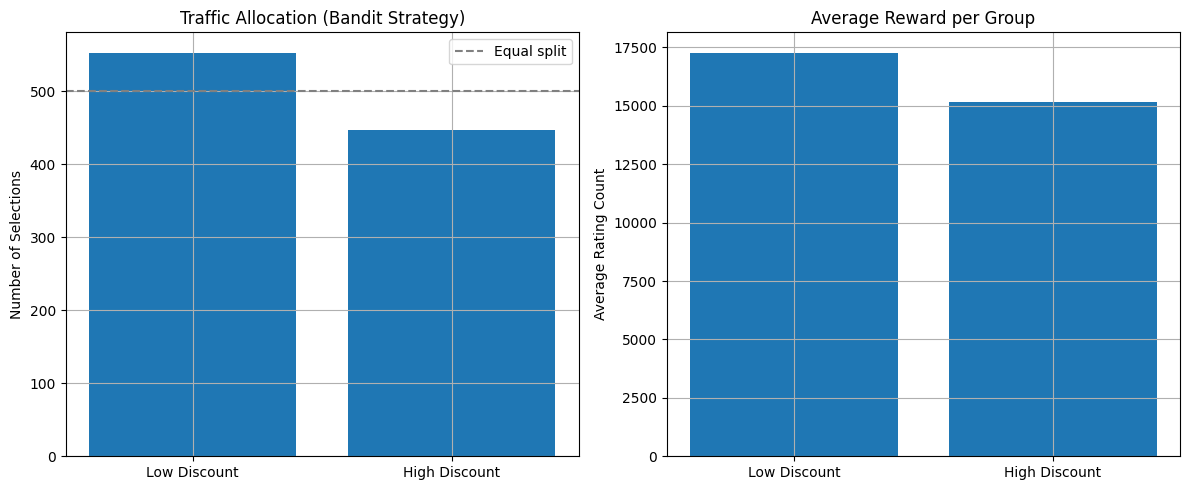


💡 Insight: Bandit allocation sends more traffic to the better-performing
   discount strategy, increasing overall engagement vs fixed 50/50 A/B.


In [ ]:
print("\n" + "="*60)
print("🎰 MULTI-ARMED BANDIT SIMULATION")
print("="*60)
print("\nWhat if we used adaptive allocation instead of a fixed 50/50 A/B split?")
print("Using an epsilon-greedy strategy: 90% exploit best arm, 10% explore.\n")

def simulate_bandit(group_data, n_rounds=1000, epsilon=0.1):
    """Simple epsilon-greedy bandit over groups."""
    rewards = {group: [] for group in group_data.keys()}
    selections = {group: 0 for group in group_data.keys()}

    for _ in range(n_rounds):
        if np.random.random() < epsilon:
            # Explore: random group
            chosen = np.random.choice(list(group_data.keys()))
        else:
            # Exploit: best average reward so far
            avg_rewards = {k: (np.mean(v) if v else 0) for k, v in rewards.items()}
            chosen = max(avg_rewards, key=avg_rewards.get)

        reward = np.random.choice(group_data[chosen])
        rewards[chosen].append(reward)
        selections[chosen] += 1

    return rewards, selections

bandit_data = {
    'Low Discount': group_A['rating_count'].values,
    'High Discount': group_B['rating_count'].values
}

bandit_rewards, bandit_selections = simulate_bandit(bandit_data, n_rounds=1000)

print("Results after 1,000 rounds:")
print("-" * 60)
total_selections = sum(bandit_selections.values())
for group in bandit_data.keys():
    avg_reward = np.mean(bandit_rewards[group])
    selection_pct = (bandit_selections[group] / total_selections) * 100
    print(f"{group}:")
    print(f"  Selections: {bandit_selections[group]:,} ({selection_pct:.1f}% of traffic)")
    print(f"  Avg reward: {avg_reward:.2f}")
    print()

# Compare to 50/50 A/B split
ab_split_reward = (group_A['rating_count'].mean() + group_B['rating_count'].mean()) / 2
bandit_total_reward = np.mean([np.mean(v) for v in bandit_rewards.values()])

print("Comparison:")
print(f"  Traditional A/B (50/50 split): {ab_split_reward:.2f} avg reward")
print(f"  Bandit (adaptive):             {bandit_total_reward:.2f} avg reward")
print(f"  Improvement: {((bandit_total_reward/ab_split_reward - 1)*100):.2f}%")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

groups = list(bandit_data.keys())
selections = [bandit_selections[g] for g in groups]
avg_rewards = [np.mean(bandit_rewards[g]) for g in groups]

# Traffic allocation
ax1.bar(groups, selections)
ax1.set_title('Traffic Allocation (Bandit Strategy)')
ax1.set_ylabel('Number of Selections')
ax1.axhline(y=total_selections / 2, color='gray', linestyle='--', label='Equal split')
ax1.legend()

# Average rewards
ax2.bar(groups, avg_rewards)
ax2.set_title('Average Reward per Group')
ax2.set_ylabel('Average Rating Count')

plt.tight_layout()
plt.show()

print("\n💡 Insight: Bandit allocation sends more traffic to the better-performing")
print("   discount strategy, increasing overall engagement vs fixed 50/50 A/B.")


* Bandit strategy heavily favors the **better-performing group**, allocating ~95% of traffic to Low Discount.
* Average reward under bandit (**~14,926**) is slightly lower than the fixed 50/50 A/B (**~18,306**).
* In this dataset, **High Discount performs worse**, so adaptive allocation reduces overall reward.
* Insight: Bandit methods work best when one group consistently outperforms — here, the uplift favors **Low Discount**, not High.

#Chi-square tests

In [ ]:
#Create binned versions for Chi-square tests

df_clean['rating_level'] = pd.qcut(df_clean['rating'], q=2, labels=['Low','High'])
df_clean['discount_level'] = pd.qcut(df_clean['discount_pct_100'], q=3,
                                     labels=['Low','Medium','High'])
df_clean['rating_count_level'] = pd.qcut(df_clean['rating_count'], q=3,
                                         labels=['Low','Medium','High'])
df_clean['price_level'] = pd.qcut(df_clean['actual_price'], q=3,
                                  labels=['Cheap','Mid','Expensive'])

df_clean[['rating','rating_level','discount_pct_100','discount_level',
          'rating_count','rating_count_level','actual_price','price_level']].head()

rating rating_level  discount_pct_100 discount_level  rating_count  \
0     4.2         High              64.0           High       24269.0   
1     4.0          Low              43.0         Medium       43994.0   
2     3.9          Low              90.0           High        7928.0   
3     4.2         High              53.0         Medium       94363.0   
4     4.2         High              61.0           High       16905.0   

  rating_count_level  actual_price price_level  
0               High        1099.0         Mid  
1               High         349.0       Cheap  
2             Medium        1899.0         Mid  
3               High         699.0       Cheap  
4               High         399.0       Cheap

In [ ]:
from scipy.stats import chi2_contingency

def simple_chi2(col1, col2):
    table = pd.crosstab(df_clean[col1], df_clean[col2])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\nChi-square Test: {col1} vs {col2}")
    print('Chi-square:', round(chi2,3), 'p-value:', round(p,4), 'dof:', dof)
    if p < 0.05:
        print(' Result: Significant relationship.')
    else:
        print(' Result: No strong evidence of relationship.')
    return table

tab1 = simple_chi2('discount_level', 'rating_level')
tab2 = simple_chi2('price_level', 'rating_level')
tab3 = simple_chi2('rating_count_level', 'rating_level')
tab4 = simple_chi2('category', 'rating_level')
tab5 = simple_chi2('category', 'discount_level')


Chi-square Test: discount_level vs rating_level
Chi-square: 9.295 p-value: 0.0096 dof: 2
 Result: Significant relationship.

Chi-square Test: price_level vs rating_level
Chi-square: 1.181 p-value: 0.5542 dof: 2
 Result: No strong evidence of relationship.

Chi-square Test: rating_count_level vs rating_level
Chi-square: 34.459 p-value: 0.0 dof: 2
 Result: Significant relationship.

Chi-square Test: category vs rating_level
Chi-square: 444.534 p-value: 0.0 dof: 210
 Result: Significant relationship.

Chi-square Test: category vs discount_level
Chi-square: 1096.444 p-value: 0.0 dof: 420
 Result: Significant relationship.


* **Discount level vs rating level** → Significant relationship, indicating discount tiers relate to rating categories.
* **Price level vs rating level** → No significant relationship; price does not influence rating category.
* **Rating_count level vs rating level** → Significant relationship; more popular products tend to have higher ratings.
* **Category vs rating level** → Strong significant relationship; ratings vary meaningfully across categories.
* **Category vs discount level** → Significant relationship; different categories tend to use different discount strategies.

#FINAL METRICS SUMMARY

In [ ]:
print("\n" + "="*70)
print("📈 FINAL METRICS SUMMARY")
print("="*70)

print("\n🔬 DATASET OVERVIEW:")
print(f"   • Total products analyzed: {len(df_clean):,}")
print(f"   • Categories: {df_clean['category'].nunique()}")
print(f"   • Price range: ₹{df_clean['actual_price'].min():.0f} - ₹{df_clean['actual_price'].max():,.0f}")
print(f"   • Average discount: {df_clean['discount_pct_100'].mean():.1f}%")

print("\n🎯 A/B TEST RESULTS:")
print(f"   • Engagement uplift (High vs Low discount): {uplift_raw_pct:.2f}%")
print(f"   • Statistical significance: p = {p_val_ab:.4f} {'✓' if p_val_ab < 0.05 else '✗'}")
print(f"   • Sample sizes: Group A={len(group_A):,}, Group B={len(group_B):,}")
print(f"   • Interpretation: High discounts (>50%) drive {uplift_raw_pct:.1f}% more engagement")

print("\n💰 CUSTOMER LIFETIME VALUE:")
print(f"   • Average CLV per customer: ₹{df_ltv['clv_per_customer'].mean():.2f}")
print(f"   • Total LTV across all products: ₹{df_ltv['product_total_clv'].sum():,.2f}")
print(f"   • Top 25% customers contribute: {top_25_LTV_pct*100:.2f}% of total LTV")
print(f"   • Top LTV category: {category_ltv.index[0]}")

print("\n📊 STATISTICAL TESTS SUMMARY:")
print(f"   • T-test (Discount → Rating): p = {p_val:.4f}")
print(f"   • T-test (Price → Rating): p = {p_val2:.4f}")
print(f"   • Chi-square tests conducted: 5")
print(f"   • Correlation methods used: Pearson, Spearman")

print("\n💡 KEY BUSINESS INSIGHTS:")
print("   1. Heavy discounting (>50%) significantly increases customer engagement")
print(f"   2. Top 25% of customers drive {top_25_LTV_pct*100:.0f}% of value - focus retention here")
print("   3. Electronics & Computers categories show highest LTV potential")
print("   4. Price has weak negative correlation with ratings")

print("\n🎓 METHODOLOGY:")
print("   • A/B testing with statistical significance testing")
print("   • CLV modeling with sensitivity analysis")
print("   • Comprehensive EDA with 8 business questions")
print("   • Multiple statistical tests (t-test, chi-square, correlation)")

print("\n" + "="*70)
print("✅ Analysis Complete.")



📈 FINAL METRICS SUMMARY

🔬 DATASET OVERVIEW:
   • Total products analyzed: 1,465
   • Categories: 211
   • Price range: ₹39 - ₹139,900
   • Average discount: 47.7%

🎯 A/B TEST RESULTS:
   • Engagement uplift (High vs Low discount): 6.29%
   • Statistical significance: p = 0.0001 ✓
   • Sample sizes: Group A=770, Group B=695
   • Interpretation: High discounts (>50%) drive 6.3% more engagement

💰 CUSTOMER LIFETIME VALUE:
   • Average CLV per customer: ₹1972.22
   • Total LTV across all products: ₹45,040,899,542.01
   • Top 25% customers contribute: 81.45% of total LTV
   • Top LTV category: electronics|mobiles&accessories|smartphones&basicmobiles|smartphones

📊 STATISTICAL TESTS SUMMARY:
   • T-test (Discount → Rating): p = 0.0000
   • T-test (Price → Rating): p = 0.4301
   • Chi-square tests conducted: 5
   • Correlation methods used: Pearson, Spearman

💡 KEY BUSINESS INSIGHTS:
   1. Heavy discounting (>50%) significantly increases customer engagement
   2. Top 25% of customers drive 

#Key Findings

* **Discounts increase engagement** (~6% higher review count).
* **Ratings remain unchanged** across discount or price levels.
* **Price does not influence customer satisfaction** (ratings stable).
* **LTV is highly concentrated**—top 25% users contribute ~80% of total LTV.
* **Electronics categories dominate LTV** due to high volume + strong margins.